# ¿Qué vende un vehículo?


Por medio del siguiente análisis, estudiaremos datos recopilados durante los último años en 'Crankshaft List', sobre vehículos, con el fin de determinar los factores que influyen en sus valores, tales como: el millaje, el modelo, su condición, entre otros.

Para esto, primero cargaremos el DataFrame y las librerías necesarias para llevar a cabo este análisis. Luego veremos si hay valores erróneos o ausentes en la tabla para posteriormente corregirlos. Después añadiremos o reemplazaremos información para facilitar el estudio. Luego de abordar los problemas de la tabla, llevaremos a cabo el análisis exploratorio para determinar los factores que inciden en los valorer de los vehículos. Y finalmente expondremos una conclusión general.

## Inicialización

Comenzaremos por agregar la librerías necesarias para llevar a cabo el proyecto.

In [ ]:
# Cargamos todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Cargar datos

Cargamos los datos del proyecto, visualizamos la tabla y obtenemos información sobre las filas y columnas.

In [ ]:
# Cargamos el archivo de datos en un DataFrame
vehicles_list = pd.read_csv("/datasets/vehicles_us.csv")
vehicles_list.info()
vehicles_list.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [ ]:
# Visualizamos filas y columnas
print("Columnas de la tabla:\n")
print(vehicles_list.columns.tolist())
print()
print("Número de filas y columnas:\n")
print(vehicles_list.shape)

Columnas de la tabla:

['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'type', 'paint_color', 'is_4wd', 'date_posted', 'days_listed']

Número de filas y columnas:

(51525, 13)


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina


In [ ]:
# imprimimos la información general/resumida sobre el DataFrame
vehicles_list.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [ ]:
# imprimimos una muestra de datos
vehicles_list.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


A simple vista podemos observar que la tabla **'vehicles_list'** está formada por 13 columnas y 51.525 filas. De acuerdo a lo que se puede ver, los nombres de las columnas tienen un formato adecuados. Además, al visualizar el DataFrame podemos notar que las columnas **'model_year'**, **'cylinders'**, **'odometer'**, **'paint_color'** y **'is_4wd'** contienen valores ausentes.

A continuación analizaremos las columnas tipo int y float.

In [ ]:
# Análisis de la columna 'price'
print(f"Valores de la columna 'price':\n\n{vehicles_list.price.describe()}")
print()
print("Mediana de 'price':", vehicles_list.price.median())

Valores de la columna 'price':

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

Mediana de 'price': 9000.0


Aquí podemos observar que los valores son muy variados. Su mediana es de 9.000 y su valor máximo es de 375.000, lo que no es de extrañar ya que en el DataFrame podemos encontrar desde autos promedio hasta autos de lujo costosos. También encontramos que el valor mínimo es de 1, lo cual podría indicar que el vendedor está abierto a negociar el valor de su vehículo, pero esto lo estudiaremos más a fondo para decidir si este valor se reemplazará por un valor más real o dejarlo como un indicador relevante (ver si los vehículos con 1 se venden más rápido).

In [ ]:
# Análisis de la columna 'model_year'
print(f"Valores de la columna 'model_year':\n\n{vehicles_list.model_year.describe()}")
print()
print("Mediana de 'model_year':", vehicles_list.model_year.median())

Valores de la columna 'model_year':

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

Mediana de 'model_year': 2011.0


Aquí podemos observar que los vahículos más antiguos percenecen al año 1908, mientras que los más nuevos al 2019, y su mediana es 2011. Los años se encuentran en números flotantes, lo que más adelante dejaremos en números enteros.

In [ ]:
#Análisis de la columna 'odometer'
print(f"Valores de la columna 'odometer':\n\n{vehicles_list.odometer.describe()}")
print()
print("Mediana de 'odometer':", vehicles_list.odometer.median())

Valores de la columna 'odometer':

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

Mediana de 'odometer': 113000.0


Aquí podemos ver que el millaje medio es de 113.000, y que el valor máximos es de 990.000. Su valor mínimo es de 0 ya que también hay autos nuevos a la venta. Esta columna la pasaremos de float a int64.

In [ ]:
# Análisis de la columna 'days_listed'
print(f"Valores de la columna 'days_listed':\n\n{vehicles_list.days_listed.describe()}")
print()
print("Mediana de 'days_listed':", vehicles_list.days_listed.median())

Valores de la columna 'days_listed':

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

Mediana de 'days_listed': 33.0


En esta columna los rangos van desde los 0 días, debido a publicaciones recientes, hasta 271 días. En esta columna todo parece estar en orden.



Por otro lado estudiaremos las columnas de tipo object: **'model'**, **'condition'**, **'fuel'**, **'transmission'**, **'type'**, **'paint_color'** y **'date_posted'**, para ver si tienen datos inapropiados.

In [ ]:
vehicles_list.model.sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
       'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty',
       'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus

En esta columna podemos obervar que hay modelos de vehiculos repetidos, por ejemplo:

-'chevrolet camaro lt coupe 2d', 'chevrolet camaro'

-'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado'

-'ford f-150', ''ford f150', 'ford f150 supercrew cab xlt'

-'ford f-250', 'ford f250 sd', 'ford f-250 super duty', 'ford f-250 sd'

-'ford f-350 sd', 'ford f350', 'ford f350 super duty'

-'ford focus', 'ford focus se'

-'ford fusion', 'ford fusion se'

-'ford mustang', 'ford mustang gt coupe d2'

Tenemos la seguridad de que algunos modelos son lo mismo, por ejemplo: 'ford f-150', ''ford f150'.
Para otros casos tendremos que averiguar si se trata del mismo modelo o no, por ejemplo: -'chevrolet silverado 1500', 'chevrolet silverado 1500 crew'

In [ ]:
vehicles_list.condition.unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

La columna **'condition'** en general se ve bien. Aquí solo le pondremos 'snake_case' a 'like new'.

In [ ]:
vehicles_list.fuel.unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

Los datos de la columna **'fuel'** están correctos.

In [ ]:
vehicles_list.transmission.unique()

array(['automatic', 'manual', 'other'], dtype=object)

Los valores de la columna **'transmission'** también están en orden.

In [ ]:
vehicles_list.type.unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

La columna **'type'** en general está bien. Aquí solo se dejará 'SUV' en minúsculas y se reemplazará 'mini-van' por 'mini_van'.

In [ ]:
vehicles_list.paint_color.unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

Como se mencionó anteriormente, la columna **'paint_color'** tiene valores ausentes. Más allá de eso está todo en orden.

In [ ]:
print(vehicles_list.date_posted.head(10))
print(vehicles_list.date_posted.max())

0    2018-06-23
1    2018-10-19
2    2019-02-07
3    2019-03-22
4    2019-04-02
5    2018-06-20
6    2018-12-27
7    2019-01-07
8    2018-07-16
9    2019-02-15
Name: date_posted, dtype: object
2019-04-19


Los valores de la columna **'date_posted'** parecen estar en orden. El unico detalle aquí es que la columna se encuentra en formato 'object' por lo que la convertiremos en tipo fecha por si queremos manipular los números.



Como mencionamos anteriormente, **'model_year'**, **'cylinders'**, **'odometer'**, **'paint_color'** y **'is_4wd'** contienen valores ausentes. Al ver los datos a continuación, la columna **'is_4wd'** es la que tiene más valores ausentes con un 50% de estos.

In [ ]:
print(f"Número de filas con valores ausentes en 'model_year': {vehicles_list.model_year.isna().sum()}")
mdp = int(vehicles_list.model_year.isna().sum()/len(vehicles_list.model_year)*100)
print(F"Porentaje de valores ausentes {mdp}%")

Número de filas con valores ausentes en 'model_year': 3619
Porentaje de valores ausentes 7%


In [ ]:
print(f"Número de filas con valores ausentes en 'cylinders': {vehicles_list.cylinders.isna().sum()}")
cyp = int(vehicles_list.cylinders.isna().sum()/len(vehicles_list.cylinders)*100)
print(F"Porentaje de valores ausentes {cyp}%")

Número de filas con valores ausentes en 'cylinders': 5260
Porentaje de valores ausentes 10%


In [ ]:
print(f"Número de filas con valores ausentes en 'odometer': {vehicles_list.odometer.isna().sum()}")
odp = int(vehicles_list.odometer.isna().sum()/len(vehicles_list.odometer)*100)
print(F"Porentaje de valores ausentes {odp}%")

Número de filas con valores ausentes en 'odometer': 7892
Porentaje de valores ausentes 15%


In [ ]:
print(f"Número de filas con valores ausentes en 'paint_color': {vehicles_list.paint_color.isna().sum()}")
pcp = int(vehicles_list.paint_color.isna().sum()/len(vehicles_list.paint_color)*100)
print(F"Porentaje de valores ausentes {pcp}%")

Número de filas con valores ausentes en 'paint_color': 9267
Porentaje de valores ausentes 17%


In [ ]:
print(f"Número de filas con valores ausentes en 'is_4wd': {vehicles_list.is_4wd.isna().sum()}")
is4p = int(vehicles_list.is_4wd.isna().sum()/len(vehicles_list.is_4wd)*100)
print(F"Porentaje de valores ausentes {is4p}%")

Número de filas con valores ausentes en 'is_4wd': 25953
Porentaje de valores ausentes 50%


### Conclusiones y siguientes pasos

El DataFrame consta de 13 columnas y 51525 filas. El nombre de las columnas tiene un formato correcto. Además, al visualizar el DataFrame podemos notar que las columnas **'model_year'**, **'cylinders'**, **'odometer'**, **'paint_color'** y **'is_4wd'** contienen valores ausentes, siendo esta última la que contiene la mayor cantidad de estos valores (50%).Las columnas 'model_year', 'odometer', 'cylinders' y 'date_posted' tienen problemas que abordaremos. También tenemos la columna 'model' con valores duplicados que deberemos revisar. Las columnas 'condition' y 'type' tienen detalles que mejoraremos. Por otro lado las columnas 'fuel' y 'transmission' están en orden.

[Explica tus próximos pasos y cómo se correlacionan con las conclusiones que has hecho hasta ahora. Específicamente, debe quedar claro qué parte de los datos deben tratarse para que sean más adecuados para el análisis requerido.]

Primero trataremos los problemas de 'condition' y 'type' que son los más sencillos. Luego abordaremos los duplicados de la columna 'model' para simplificar su visualización. Luego abordaremos los valores ausentes para evitar que influyan de forma negativa en nuestro estudio. Luego cambiaremos de formato de float a int64 la columna 'cylinders', 'model_year' y 'odometer', y la columna 'date_posted' a DateTime para poder filtrar por fechas. Finalmente agregaremos factores adicionales para facilitar el análisis.

In [ ]:
#En la columna 'condition' reemplazamos 'like new' por 'like_new'
vehicles_list.condition.replace('like new', 'like_new', inplace=True)

In [ ]:
#Comprobamos que esté todo en orden
vehicles_list.condition.unique()

array(['good', 'like_new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [ ]:
#En la columna 'type' reemplazamos 'SUV' por 'suv'
vehicles_list.type.replace('SUV', 'suv', inplace=True)

In [ ]:
#Comprobamos que esté todo en orden
vehicles_list.type.unique()

array(['suv', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

En la columna 'model' solo abordaremos los duplicados más evidentes, que serían los siguientes:

1. 'ford f150' y 'ford f-150'
2. 'ford f250' y 'ford f-250'
3. 'ford f250 super duty', 'ford f-250 sd', 'ford f-250 super duty'
4. 'ford f350 super duty' y 'ford f-350 sd'

Guardaremos estos valores de forma más ordenada como: 'ford f-150', 'ford f-250', 'ford f-250 sd' y 'ford f-350 sd'.


In [ ]:
vehicles_list.model.replace('ford f150', 'ford f-150', inplace=True)
vehicles_list.model.replace('ford f250', 'ford f-250', inplace=True)
vehicles_list.model.replace('ford f250 super duty', 'ford f-250 sd', inplace=True)
vehicles_list.model.replace('ford f-250 super duty', 'ford f-250 sd', inplace=True)
vehicles_list.model.replace('ford f350 super duty', 'ford f-350 sd', inplace=True)

In [ ]:
#comrobamos que todo haya quedado en orden
vehicles_list.model.sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-350 sd', 'ford f150 supercrew cab xlt', 'ford f350',
       'ford focus', 'ford focus se', 'ford fusion', 'ford fusion se',
       'ford mustang', 'ford mustang gt coupe 2d', 'ford ranger',
 

A modelos tales como 'ford fusion' y 'ford fusion se' no los modificaremos, ya que son vehículos distintos(motores distintos), lo mismo ocurre con, por ejemplo, 'ford mustang' y 'ford mustang gt coupe d2'. Parecieran ser el mismo vehículo pero tienen especificaciones técnicas distintas.

## Tratar los valores ausentes (si hay)

Ahora estudiaremos los valores ausentes de cada columna y en más detalle, para decidir de qué manera los abordaremos.
Estas son las columnas con valores ausentes a estudiar: **'model_year'**, **'cylinders'**, **'odometer'**, **'paint_color'** y **'is_4wd'**.

Para realizar nuestro análisis realizaremos los siguientes pasos:

1. Para 'model_year' veremos si la columna 'odometer' nos puede servir para encontrar medias o medianas con el fin de abordar los valores ausentes.
2. Para 'cylinders' veremos si la columna 'type' nos puede servir para rellenar los valores ausentes.
3. Para la columna 'odometer' veremos si 'model_year' nos sirven para encontrar una media o mediana para abordar los valores ausentes.
4. Para 'paint_color' veremos si hay algún patrón o columna que nos pueda servir para abordarla.
5. Para la columna 'is_4w' lo primero que haremos es comprobar si tien algún valor 0. Como esta columna representa datos booleanos, solo debe tener 1 o 0. Si no tienen ningún cero, quiere decir que nuestros datos ausentes son los 0 que se cargaron mal en el DataFrame.


Utilizaremos también para nuestro estudio la base sin valores ausentes para revisar cuanto afectaría no tener estos en nuestra base.

In [ ]:
vehicles_list_dropna = vehicles_list.dropna()
vehicles_list_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14852 entries, 5 to 51515
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         14852 non-null  int64  
 1   model_year    14852 non-null  float64
 2   model         14852 non-null  object 
 3   condition     14852 non-null  object 
 4   cylinders     14852 non-null  float64
 5   fuel          14852 non-null  object 
 6   odometer      14852 non-null  float64
 7   transmission  14852 non-null  object 
 8   type          14852 non-null  object 
 9   paint_color   14852 non-null  object 
 10  is_4wd        14852 non-null  float64
 11  date_posted   14852 non-null  object 
 12  days_listed   14852 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 1.6+ MB


Como se puede observar, la cantidad de valores ausentes eliminados es significativa, por lo que intentaremos reemplazar estos valores.

**Analizamos la columna 'is_4w'**

Los primero que haremos es ver si hay valores 0 en esta columna. Si no los hay quiere decir que el DataFrame tomó los 0 como valores ausentes. De este modo reemplazaremos los 'NaN' por ceros.

In [ ]:
vehicles_list.query('is_4wd == 0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


Al comprobar que no tiene ceros, reemplazaremos los valores ausentes por ceros.

In [ ]:
vehicles_list.is_4wd.fillna(0, inplace=True)

In [ ]:
#Comprobamos que se hayan efectuado los cambios
vehicles_list.is_4wd.unique()

array([1., 0.])

Para finalizar, dejaremos esta columna en valores de tipo booleanos (bool).

In [ ]:
vehicles_list["is_4wd"] = vehicles_list.is_4wd.astype(bool)

In [ ]:
#Comprobamos los cambios
vehicles_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


**Analizamos la columna 'odometer'**

In [ ]:
odometer_filtered_nan = vehicles_list[vehicles_list.odometer.isna()]
odometer_filtered_nan.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,True,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,suv,red,True,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,False,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like_new,4.0,gas,NaN,automatic,sedan,NaN,False,2018-07-26,43


Primero analizaremos el comportamiento de los valores de la columna 'odometer'.

In [ ]:
print(f"Descripción de valores de la columna 'odometer':\n\n{vehicles_list.odometer.describe()}")
print()
print("Mediana de 'odometer':", vehicles_list.odometer.median())

Descripción de valores de la columna 'odometer':

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

Mediana de 'odometer': 113000.0


Como podemos ver, el rango de distribución de los valores es considerable, siendo 0 el mínimo y 990.000 el máximos. Por otra parte, la media (115.553) y la mediana (113.000) no constituyen una gran variación.

A continuación revisaremos los valores ausentes de 'odometer' en la columna 'model_year'.

In [ ]:
odometer_filtered_nan['model_year'].value_counts(normalize=True)

2013.0    0.078034
2014.0    0.073812
2012.0    0.072995
2015.0    0.069999
2011.0    0.068364
2008.0    0.065096
2016.0    0.060466
2010.0    0.053112
2007.0    0.052295
2017.0    0.051614
2018.0    0.046030
2005.0    0.043851
2009.0    0.043715
2006.0    0.043307
2004.0    0.033229
2003.0    0.029416
2002.0    0.022062
2000.0    0.017976
2001.0    0.017704
1999.0    0.010622
1998.0    0.008307
1997.0    0.007490
2019.0    0.007082
1996.0    0.003541
1995.0    0.003268
1993.0    0.002996
1994.0    0.002587
1989.0    0.001907
1986.0    0.001089
1992.0    0.001089
1990.0    0.001089
1991.0    0.000681
1968.0    0.000545
1988.0    0.000545
1966.0    0.000545
1977.0    0.000409
1970.0    0.000409
1983.0    0.000272
1978.0    0.000272
1929.0    0.000136
1960.0    0.000136
1964.0    0.000136
1974.0    0.000136
1976.0    0.000136
1975.0    0.000136
1987.0    0.000136
1973.0    0.000136
1985.0    0.000136
1971.0    0.000136
1980.0    0.000136
1979.0    0.000136
1982.0    0.000136
1908.0    0.

Como se puede observar en la distribución de de valores ausentes de 'odometer' en la columna 'model_year', desde 1999 (1%) hasta 2013 (7.8%) es donde se encuentran los mayores porcentajes de valores ausentes del odómetro, concentrandose aquí la mayor cantidad de valores ausentes. Desde el año 2014 el porcentaje comienza a bajar progresivamente de un 7.3% a un 0.7 en el año 2019. Desde el año 1998 hacia abajo los porcentajes son bastante menores.

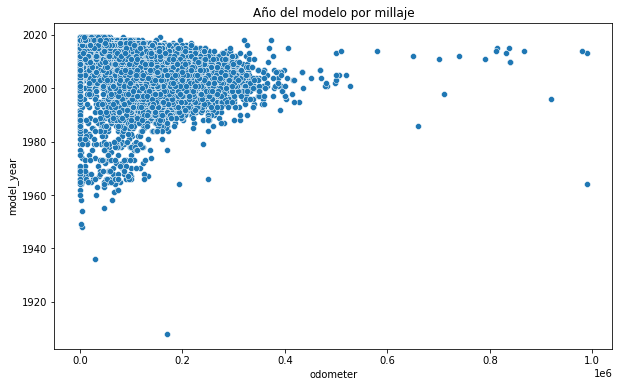

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vehicles_list, x='odometer', y='model_year')
plt.title('Año del modelo por millaje')
plt.show()


Al observar el gráfico podemos ver que existen valores atípicos. Por consiguiente filtraremos nuestro gráfico basandonos en los años que sabemos que tienen la mayoría de los valores ausentes, es decir, entre el año 2000 y 2020, y también vamos a cortar los valores atípicos que corresponden más o menos a todos lo que tienen más de 200000 de millaje en 'odometer'.

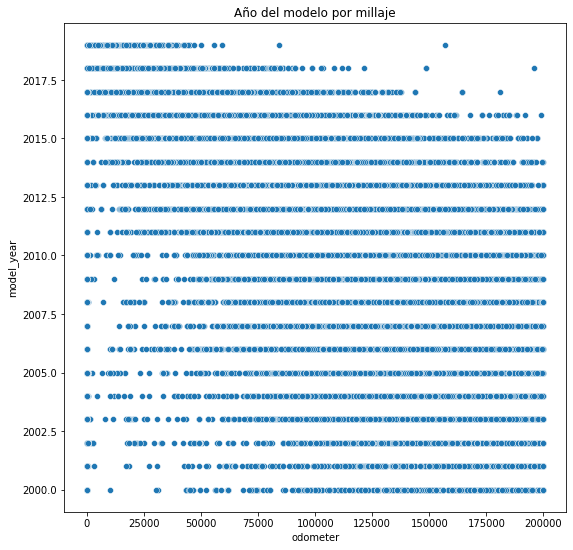

In [ ]:
vehicle_filtered = vehicles_list.loc[lambda x: (x['model_year'].between(2000, 2020)) & (x['odometer'] <= 200000)]

plt.figure(figsize=(9,9))
sns.scatterplot(data=vehicle_filtered, x='odometer', y='model_year')
plt.title("Año del modelo por millaje")
plt.show()

Con esto podemos comprobar que si sacamos una media de la columna 'odometer' entre los años 2000 y 2020, dejando de lado los valores extremos, tendremos un valor promedio bastante realista que podría servir para completar los valores ausentes.

Ahora encontraremos este valor.

In [ ]:
print("La media de la columna 'odometer' entre el año 2000 y 2020 eliminando los valores extremos es:")
vehicles_list.query('model_year >= 2000 and model_year <= 2020 and odometer <= 200000')['odometer'].mean()

La media de la columna 'odometer' entre el año 2000 y 2020 eliminando los valores extremos es:


102373.60171451131

Otra alternativa mejor sería imputar en base a las medianas de 'odometer' en función a **'condition'**, que es un parámetro que no posee valores ausentes.

In [ ]:
#Calculamos las medianas de 'odometer' en función a 'condition'.
print("Medianas por 'model_years_group:")
odometer_condition_median = vehicles_list.pivot_table(index='condition', values='odometer', aggfunc='median')
print(odometer_condition_median.sort_values('odometer', ascending = False))

Medianas por 'model_years_group:
           odometer
condition          
fair       181613.0
salvage    142673.5
good       129000.0
excellent  104230.0
like_new    72982.5
new          8002.0


Como calculamos anteriormente, nuestra media de 'odometer' entre los años 2000 y 2020 era de 102.373, pero al calcular las medianas en función a **'condition'** observamos que tenemos valores variados, como la mediana de 'fair' que es 181.613 y la de 'good' que es 129.000. Esto nos entregará valores más realistas al momento de rellenar los valores ausentes.

A continuación rellenaremos los valores ausentes con las medianas de 'odometer' en función a los valores de 'condition'

In [ ]:
#Utilizamos una función para completar los valores ausentes

def fillna_by_other_column(df, target_column, column_to_replace, agg = "mean"):
    grouped = df.groupby(column_to_replace).agg({target_column: ["mean","median"]})

    for index in grouped.index:
        df.loc[df[target_column].isna() & (df[column_to_replace] == index),  target_column] = grouped.loc[index,(target_column, agg)]

    return df

In [ ]:
# Comprobamos si funciona
fillna_by_other_column(vehicles_list, "odometer", "condition", agg = "median")

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like_new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like_new,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,False,2018-07-02,71


In [ ]:
#Persistimos los cambios en nuestro DataFrame
vehicles_list = fillna_by_other_column(vehicles_list, "odometer", "condition", agg = "median")

In [ ]:
#comprobamos si hay valores nulos en 'odometer'
print(f"Valores nulos en 'odometer':{vehicles_list.odometer.isna().sum()}")
print()
vehicles_list.info()

Valores nulos en 'odometer':0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


Como se puede observar hemos rellenado exitosamente los valores en 'odometer', con las medianas de 'odometer' en función de la columna 'condition'.

**Analizamos la columna 'model_year'**

In [ ]:
model_list_isna = vehicles_list['model_year'].isna()
vehicles_list.loc[model_list_isna]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,suv,silver,True,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,False,2018-09-23,15
69,7800,NaN,ford f-150,like_new,8.0,gas,97510.0,automatic,truck,white,True,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,True,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f-250 sd,good,8.0,gas,135778.0,automatic,truck,red,True,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,suv,silver,True,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,True,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,True,2018-12-27,37


Al revisar el DataFrame con valores ausentes en 'model_year', no encontramos algún tipo de patrón aparente.

Ahora calculamos las medianas de **'model_years'** en función a **'model'**, ya que son parámetros que están estrechamente relacionados.

In [ ]:
#Calculamos las medianas función a 'model'.
print("Medianas de 'model_years' en función a 'model':")
odometer_model_median = vehicles_list.pivot_table(index='model', values='model_year', aggfunc='median')
print(odometer_model_median.sort_values(by='model_year', ascending = False))

Medianas de 'model_years' en función a 'model':
                               model_year
model                                    
nissan frontier crew cab sv        2018.0
chevrolet camaro lt coupe 2d       2017.0
ford mustang gt coupe 2d           2016.0
chevrolet silverado 1500 crew      2016.0
ford f150 supercrew cab xlt        2015.0
...                                   ...
jeep grand cherokee laredo         2006.0
chevrolet trailblazer              2005.0
ford ranger                        2004.0
dodge dakota                       2004.0
chevrolet corvette                 2000.0

[95 rows x 1 columns]


Ahora tenemos las medianas de 'model_year' en función a 'model'. Estos valores los utilizaremos para imputar los valores ausentes en 'model_year.

In [ ]:
#Nuevamente utilizamos esta función para completar los valores ausentes

def fillna_by_other_column(df, target_column, column_to_replace, agg = "mean"):
    grouped = df.groupby(column_to_replace).agg({target_column: ["mean","median"]})

    for index in grouped.index:
        df.loc[df[target_column].isna() & (df[column_to_replace] == index),  target_column] = grouped.loc[index,(target_column, agg)]

    return df

In [ ]:
# Aplicamos la función
fillna_by_other_column(vehicles_list, "model_year", "model", agg = "median")

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like_new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like_new,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,False,2018-07-02,71


In [ ]:
#Persistimos los cambios
vehicles_list = fillna_by_other_column(vehicles_list, "model_year", "model", agg = "median")

In [ ]:
#comprobamos si hay valores nulos en 'model_years'
print(f"Valores nulos en 'model_year: {vehicles_list.model_year.isna().sum()}")
print()
vehicles_list.info()

Valores nulos en 'model_year: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


Hasta aquí hemos completado de forma exitosa los valores ausentes de 'odometer', 'is_4wd' y 'model_year'.

**A continuación abordaremos la columna 'cylinders'**

In [ ]:
#Visualizamos la tabla con valores ausentes en 'cylinders'
cylinders_isna = vehicles_list['cylinders'].isna()
vehicles_list.loc[cylinders_isna]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,suv,blue,True,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,False,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,False,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,suv,green,False,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,False,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,False,2018-07-02,25
51442,28990,2018.0,ford f-150,excellent,NaN,gas,10152.0,automatic,truck,white,True,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,False,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,False,2018-06-22,28


Al observar la tabla a simple vista podemos ver que siempre que hay valores nulos en 'cylinders' se cumple 'gas' en la columna 'fuel'.

In [ ]:
#Filtramos la tabla por las condiciones mencionadas
gas_cylinders_conditions = vehicles_list[(vehicles_list.fuel == 'gas') & (vehicles_list.cylinders.isnull())]
len(gas_cylinders_conditions)

4826

Como analizamos anteriormente, el 10% de esta columna consta de valores ausentes(5260), donde en 4826 filas se cumplen las condiciones mencionadas. Esto podría ser un patrón. O tal vez simplemente predomina el tipo de combustible 'gas'

Una solución para abordar los valores nulos de 'cylinders' sería encontrar las medianas en función a 'model'; es decir, la cilindrada en función al modelo. Esto nos dará valore más exactos y realistas.

In [ ]:
#Medianas de 'cylinders' en función a los modelos ('model').
vehicles_list.pivot_table(index='model', values='cylinders', aggfunc= 'median')

,cylinders
model,
acura tl,6.0
bmw x5,6.0
buick enclave,6.0
cadillac escalade,8.0
chevrolet camaro,6.0
...,...
toyota sienna,6.0
toyota tacoma,6.0
toyota tundra,8.0


In [ ]:
#Aplicamos nuestra función para rellenar valores ausentes
fillna_by_other_column(vehicles_list, "cylinders", "model", agg = "median")

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like_new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like_new,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,False,2018-07-02,71


In [ ]:
#Persistimos los cambios
vehicles_list = fillna_by_other_column(vehicles_list, "cylinders", "model", agg = "median")

In [ ]:
#Comprobamos que esté todo en orden
print(f"Valores nulos en 'cylinders': {vehicles_list.cylinders.isna().sum()}")
print()
vehicles_list.info()

Valores nulos en 'cylinders': 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


**Por último abordamos la columna 'paint_color'**

Como señalamos previamente, el número de filas con valores ausentes en 'paint_color' es 9267, y el porentaje de valores ausentes es 17%. Nuevamente visualizamos la tabla con los valores ausentes de 'paint_color' en búsqueda de algún patrón.

In [ ]:
paint_color_isna = vehicles_list.paint_color.isna()
vehicles_list.loc[paint_color_isna]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,False,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,suv,NaN,True,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,True,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,suv,NaN,False,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like_new,4.0,gas,111088.0,automatic,suv,NaN,False,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,False,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,True,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,104230.0,automatic,coupe,NaN,False,2018-11-24,89


Lo que podemos observar a simple vista es que todos los vehículos con 'automatic' en 'transmission' tienen 'NaN' en 'paint_color'. Para investigar esto haremos un filtro con estas condiciones.

In [ ]:
#Filtramos la tabla por las condiciones mencionadas
transmission_paint_conditions = vehicles_list[(vehicles_list.transmission == 'automatic') & (vehicles_list.paint_color.isnull())]
len(transmission_paint_conditions)

8403

8403 de las 9267 filas con valores ausentes en 'paint_color' cumplen con estas condiciones, es decir, se desconoce el color de la gran mayoría de autos con transmisión automática, lo que podría tratarse de un patrón.
No obstante, al no poder saber de qué color es cada vehículo y al ser algo más subjetivo a los gustos de cada persona, reemplazaremos los valores nulos con 'unknown'.

In [ ]:
#Reemplazamos los valores nulos de 'paint_color' por el valor 'unknown'.
vehicles_list["paint_color"].fillna('unknown', inplace=True)

In [ ]:
#Revisamos que esté todo en orden
print(f"Valores nulos en 'paint_color': {vehicles_list.paint_color.isna().sum()}")
print()
vehicles_list.info()

Valores nulos en 'paint_color': 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


In [ ]:
# También revisaremos rápidamente si hay duplicados
f"Duplicados en el DataFrame: {vehicles_list.duplicated().sum()}"

'Duplicados en el DataFrame: 0'

## Corregir los tipos de datos

A continuación cambiaremos de formato float64 a int64 las columnas **'odometer'**, **'model_year'** y **'odometer'** para que se vean más ordenadas, y la columna **date_posted'** a DateTime para poder filtrar por fechas si fuese necesario.

In [ ]:
#'cylinders' a int64
vehicles_list.cylinders = vehicles_list.cylinders.astype(int)

In [ ]:
#'model_year' a int64
vehicles_list.model_year = vehicles_list.model_year.astype(int)

In [ ]:
#'odometer' a int64
vehicles_list.odometer = vehicles_list.odometer.astype(int)

In [ ]:
#'date_posted' a DateTime64
vehicles_list.date_posted = pd.to_datetime(vehicles_list.date_posted, format='%Y-%m-%d')

In [ ]:
#Comprobamos los cambios
vehicles_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 4.8+ MB


Ya no tenemos valores nulos y cambiamos los formatos de las columnas para poder trabajar con ellos de mejor manera!

## Enriquecer datos

Ahora que tenemos todos nuestros datos en orden vamos a agregar factores adicionales para facilitar nuestro análisis.

Ahora que nuestra columna **'date_posted'** está en formato **datetime64**, podemos segmentar las fechas en los días, meses y años en los que se ingresaron los anuncios.

In [ ]:
# Agrega valores de fecha y hora sobre cuándo se publicó el anuncio
# Creamos una columna por días
vehicles_list['ad_weekday'] = vehicles_list.date_posted.dt.weekday
vehicles_list.ad_weekday.head()

0    5
1    4
2    3
3    4
4    1
Name: ad_weekday, dtype: int64

In [ ]:
# Creamos una columna por meses
vehicles_list['ad_month'] = vehicles_list.date_posted.dt.month
vehicles_list.ad_month.head()

0     6
1    10
2     2
3     3
4     4
Name: ad_month, dtype: int64

In [ ]:
# Creamos una columna por años
vehicles_list['ad_year'] = vehicles_list.date_posted.dt.year
vehicles_list.ad_year.head()

0    2018
1    2018
2    2019
3    2019
4    2019
Name: ad_year, dtype: int64

In [ ]:
# Además crearemos diccionarios con información sobre los días de la semana y los meses
weekday_dict = {
    0 : 'lunes',
    1 : 'martes',
    2 : 'miércoles',
    3 : 'jueves',
    4 : 'viernes',
    5 : 'sábado',
    6 : 'domingo'
}

months_dict = {
    1 : 'enero',
    2 : 'febrero',
    3 : 'marzo',
    4 : 'abril',
    5 : 'mayo',
    6 : 'junio',
    7 : 'julio',
    8 : 'agosto',
    9 : 'septiembre',
    10 : 'octubre',
    11 : 'noviembre',
    12 : 'diciembre'
}

In [ ]:
# Creamos nuevas columnas 'ad_weekday_str' y 'ad_month_str' para especificar los días y los meses, en base a los diccionarios y con valores categóricos
vehicles_list['ad_weekday_str'] = vehicles_list['ad_weekday'].apply(lambda x:weekday_dict[x])
vehicles_list['ad_month_str'] = vehicles_list['ad_month'].apply(lambda x:months_dict[x])

In [ ]:
# Revisamos las columnas creadas
vehicles_list.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,ad_weekday_str,ad_month_str
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,5,6,2018,sábado,junio
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,viernes,octubre
2,5500,2013,hyundai sonata,like_new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,jueves,febrero
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,viernes,marzo
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,martes,abril


In [ ]:
# Para visualizar la hora en formato HH:MM:SS haremos lo siguiente
vehicles_list.date_posted.dt.time

0        00:00:00
1        00:00:00
2        00:00:00
3        00:00:00
4        00:00:00
           ...   
51520    00:00:00
51521    00:00:00
51522    00:00:00
51523    00:00:00
51524    00:00:00
Name: date_posted, Length: 51525, dtype: object

Al estar todos los valores en '00:00:00' no crearemos una columna con el tiempo, ya que no será de utilidad. Sin embargo, otro dato interesante que podemos agregar a nuestra tabla es los años que tenía el vehículo al momentode publicar el anuncio.

In [ ]:
# Creamos una columna con la edad de los vehículos
vehicles_list['vehicle_years'] = vehicles_list['ad_year'] - vehicles_list['model_year'].astype(int)
vehicles_list.vehicle_years.head()

0     7
1     7
2     6
3    16
4     2
Name: vehicle_years, dtype: int64

In [ ]:
# Agregamos el millaje promedio del vehículo por año
## Aquí agregaremos en millaje promedio de los vehículos en función a la cantidad de años del vehículo al momento de subir el anuncio ('vehicle_years')

#Creamos una nueva columna donde los años 0 los redondearemos a 1, para no tener problemas al calcular el millaje promedio
vehicles_list['vehicle_years_rounded'] = vehicles_list.vehicle_years.replace(0, 1)
#Creamos una nueva columna con el millaje promedio del vehículo por año
vehicles_list['odometer_mean_by_year'] = (vehicles_list['odometer'] / vehicles_list['vehicle_years_rounded']).astype(int)

In [ ]:
# Echamos un vistazo a nuestra nueva información
vehicles_list.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,ad_weekday,ad_month,ad_year,ad_weekday_str,ad_month_str,vehicle_years,vehicle_years_rounded,odometer_mean_by_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,unknown,...,2018-06-23,19,5,6,2018,sábado,junio,7,7,20714
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,...,2018-10-19,50,4,10,2018,viernes,octubre,7,7,12672
2,5500,2013,hyundai sonata,like_new,4,gas,110000,automatic,sedan,red,...,2019-02-07,79,3,2,2019,jueves,febrero,6,6,18333
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,...,2019-03-22,9,4,3,2019,viernes,marzo,16,16,11350
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,...,2019-04-02,28,1,4,2019,martes,abril,2,2,40451


In [ ]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente

## Revisamos los valores de 'condition'
vehicles_list.condition.unique()

array(['good', 'like_new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [ ]:
# Vamos a escribir una función para reemplazar los valores de 'condition' por una escala numérica del 0 al 5, donde:

# 'salvage' = 0
# 'fair' = 1
# 'good' = 2
# 'excellent' = 3
# 'like_new' = 4
# 'new' = 5

def condition_simplified(row):
    cond = row['condition']
    if 'salvage' in cond:
        return 0
    elif 'fair' in cond:
        return 1
    elif 'good' in cond:
        return 2
    elif 'excellent' in cond:
        return 3
    elif 'like_new' in cond:
        return 4
    elif 'new' in cond:
        return 5
    else:
        return 'another'

In [ ]:
# Reemplazamos los valores de la columna 'condition'
vehicles_list["condition"] = vehicles_list.apply(condition_simplified, axis=1)

In [ ]:
#comprobamos que se haya aplicado
vehicles_list["condition"].unique()

array([2, 4, 1, 3, 0, 5])

A continuación crearemos una columna con rangos de millaje de 'odometer' que nos podría ayudar a hacer algunos cálculos

In [ ]:
#revisamos los valores máximos y mínimos
vehicles_list.odometer.describe()

count     51525.000000
mean     115199.007278
std       60484.868232
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

In [ ]:
def odometer_group(odometer):
    if odometer <= 50000:
        return '0_50000'
    elif 50001 <= odometer <= 100000:
        return '50001_100000'
    elif 100001 <= odometer <= 150000:
        return '100001_150000'
    elif 150001 <= odometer <= 200000:
        return '150001_200000'
    elif 200001 <= odometer <= 250000:
        return '150001_250000'
    elif 250001 <= odometer <= 300000:
        return '250001_300000'
    elif 300001 <= odometer <= 350000:
        return '300001_350000'
    elif 350001 <= odometer <= 400000:
        return '351000_400000'
    elif 400001 <= odometer <= 450000:
        return '400001_450000'
    elif 450001 <= odometer <= 500000:
        return '450001_500000'
    elif 500001 <= odometer <= 550000:
        return '500001_550000'
    elif 550001 <= odometer <= 600000:
        return'550001_600000'
    elif 600001 <= odometer <= 650000:
        return '600001_650000'
    elif 650001 <= odometer <= 700000:
        return '650001_700000'
    elif 700001 <= odometer <= 750000:
        return '700001_750000'
    elif 750001 <= odometer <= 800000:
        return '750001_800000'
    elif 800001 <= odometer <= 850000:
        return '800001_850000'
    elif 850001 <= odometer <= 900000:
        return '850001_900000'
    elif 900001 <= odometer <= 950000:
        return '900001_950000'
    elif 950001 <= odometer <= 990000:
        return '950001_990000'
    else:
        return 'other'

Creamos una nueva columna llamada 'odometer_grouped' para posteriormente utilizarla para calcular medianas en función a los años de los modelos('model_years').

In [ ]:
#Creamos una nueva columna llamada 'odometer_grouped'
vehicles_list['odometer_grouped'] = vehicles_list['odometer'].apply(odometer_group)

In [ ]:
#revisamos sus valores únicos
vehicles_list.odometer_grouped.value_counts()

100001_150000    20325
50001_100000     11575
150001_200000     8392
0_50000           7377
150001_250000     2809
250001_300000      760
300001_350000      186
351000_400000       55
400001_450000       13
450001_500000       11
800001_850000        6
500001_550000        4
950001_990000        3
700001_750000        3
550001_600000        1
600001_650000        1
750001_800000        1
850001_900000        1
650001_700000        1
900001_950000        1
Name: odometer_grouped, dtype: int64

## Comprobar datos limpios

Ahora nuestros datos están listos para hacer el análisis. Les echaremos otro vistazo rápido para ver qué es exactamente lo que utilizaremos para el análisis.

In [ ]:
# imprimimos la información general/resumida sobre el DataFrame
vehicles_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   price                  51525 non-null  int64         
 1   model_year             51525 non-null  int64         
 2   model                  51525 non-null  object        
 3   condition              51525 non-null  int64         
 4   cylinders              51525 non-null  int64         
 5   fuel                   51525 non-null  object        
 6   odometer               51525 non-null  int64         
 7   transmission           51525 non-null  object        
 8   type                   51525 non-null  object        
 9   paint_color            51525 non-null  object        
 10  is_4wd                 51525 non-null  bool          
 11  date_posted            51525 non-null  datetime64[ns]
 12  days_listed            51525 non-null  int64         
 13  a

In [ ]:
# Echamos un vistazo a la distribución de la tabla actualizada
vehicles_list.describe()

,price,model_year,condition,cylinders,odometer,days_listed,ad_weekday,ad_month,ad_year,vehicle_years,vehicle_years_rounded,odometer_mean_by_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.796448,2.637535,6.121067,115199.007278,39.55476,3.005434,6.628491,2018.307462,8.511014,8.552780,18937.591519
std,10040.803015,6.099229,0.712447,1.657457,60484.868232,28.20427,1.997759,3.474134,0.461447,6.112979,6.057852,16270.595921
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,0.000000,1.000000,2018.000000,0.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,19.00000,1.000000,3.000000,2018.000000,4.000000,4.000000,10423.000000
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,33.00000,3.000000,7.000000,2018.000000,7.000000,7.000000,14988.000000
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,53.00000,5.000000,10.000000,2019.000000,12.000000,12.000000,21800.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,6.000000,12.000000,2019.000000,110.000000,110.000000,373200.000000


In [ ]:
# imprimimos una muestra de datos
vehicles_list.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,days_listed,ad_weekday,ad_month,ad_year,ad_weekday_str,ad_month_str,vehicle_years,vehicle_years_rounded,odometer_mean_by_year,odometer_grouped
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,unknown,...,19,5,6,2018,sábado,junio,7,7,20714,100001_150000
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,...,50,4,10,2018,viernes,octubre,7,7,12672,50001_100000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,...,79,3,2,2019,jueves,febrero,6,6,18333,100001_150000
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,unknown,...,9,4,3,2019,viernes,marzo,16,16,11350,150001_200000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,...,28,1,4,2019,martes,abril,2,2,40451,50001_100000
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,...,15,2,6,2018,miércoles,junio,4,4,14488,50001_100000
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,...,73,3,12,2018,jueves,diciembre,3,3,26404,50001_100000
7,15990,2013,honda pilot,3,6,gas,109473,automatic,suv,black,...,68,0,1,2019,lunes,enero,6,6,18245,100001_150000
8,11500,2012,kia sorento,3,4,gas,104174,automatic,suv,unknown,...,19,0,7,2018,lunes,julio,6,6,17362,100001_150000
9,9200,2008,honda pilot,3,6,gas,147191,automatic,suv,blue,...,17,4,2,2019,viernes,febrero,11,11,13381,100001_150000


Finalmente, ya no tenemos valores nulos, corregimos los formatos de las columnas y agregamos nueva información para facilitar el análisis. Ya está todo OK para comenzar con nuestro análisis!

## Estudiar parámetros principales

Para continuar con nuestro proyecto, primero estudiaremos los parámetros señalados a continuación:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Aquí analizaremos sus distribuciones y valores atípicos, para ver cómo abordaremos estos valores más adelante. Además graficaremos las distribuciones y los agruparemos en función a otros parámetros, como por ejemplo: 'price' en función a 'model', con el fin de estudiar las distribuciones de los precios de acuerdo a los modelo de los vehículos.

In [ ]:
#Crearemos una función para agrupar y obtener median, mean y count, ya que repetiremos esto varias veces
def pivot(df, column_1, column_2):
    return df.pivot_table(index=column_1, values=column_2, aggfunc=('count', 'mean', 'median'))

Para comenzar, estudiaremos el parámetro **'price'**

In [ ]:
#obtenemos su distribución y mediana
price_distribution = vehicles_list.price.describe()
print(f"Mediana de price: {vehicles_list.price.median().astype(int)}")
price_distribution

Mediana de price: 9000


count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

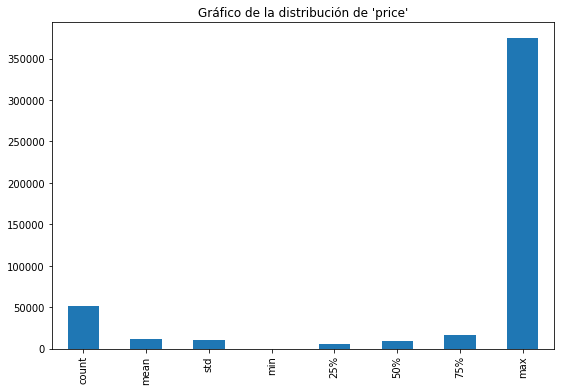

In [ ]:
# Gráfico distribución de 'price'
price_distribution.plot(kind='bar', figsize=(9, 6), title="Gráfico de la distribución de 'price'")
plt.show()

Al observar la distribución de 'price', podemos ver que su valor máximo es de 375.000 y su valor mínimo es de 1. Su media es 12.132 y su mediana 9.000. Es decir. claramente tiene valores atípicos. Algo muy curioso es que tengamos valores de 1, a continuación veremos cuántos son:

In [ ]:
vehicles_list.price.value_counts()

1        798
6995     719
5995     655
4995     624
3500     620
        ... 
37873      1
6197       1
25647      1
3138       1
340        1
Name: price, Length: 3443, dtype: int64

Aquí podemos ver que tenemos 798 valores igual a 1. Es probable que quienes publicaron sus vehículo con este valor, lo hicieran porque estaban dispuestos a negociar el precio del vehículo. Al ser un valor muy bajo lo más probable es que más adelante lo eliminemos de nuestro DataFrame, y si los dejamos, lo mejor sería hacer cálculos en base a medianas.

A continuación analizaremos el parámetro 'price' en relación a 'model' para comprender mejor su distribución en base a los modelos presentes en el DataFrame.

In [ ]:
pivot(vehicles_list, 'model', 'price')

,count,mean,median
model,,,
acura tl,236.0,6474.500000,5900.0
bmw x5,267.0,10695.891386,9775.0
buick enclave,271.0,11439.612546,9995.0
cadillac escalade,322.0,17032.059006,13995.0
chevrolet camaro,414.0,13284.961353,11961.0
...,...,...,...
toyota sienna,329.0,9046.838906,6495.0
toyota tacoma,827.0,15473.817412,13995.0
toyota tundra,603.0,14715.633499,13500.0


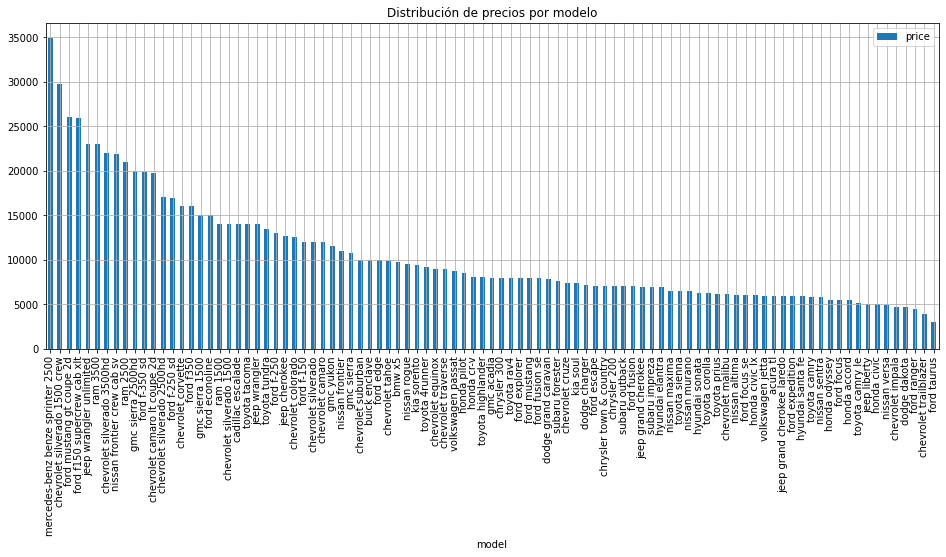

In [ ]:
# Graficamos la distribución basandonos en la mediana
model_median_price = vehicles_list.pivot_table(index='model', values='price', aggfunc='median')
model_median_price.sort_values('price', ascending=False).plot(kind='bar', title='Distribución de precios por modelo', figsize=(16,6), grid=True)
plt.show()

A pesar que decidimos visualizar solo las medianas de los valores, podemos observar que hay modelos con medianas que superan en gran medida la mediana de la columna 'price' (9.000), tal como 'mercedes-benz benze sprinter 2500' con un valor mediano de 35.000, siendo el modelo con el precio mediano más alto, entre otros modelos que también tienen valores elevados. Como explicamos anteriormente, esto se debe a que tenemos tipos de modelos de gama alta, media y, tal vez, baja. También podemos notar que más o menos la mayoría de los modelos no supera el valor mediano de 10.000.

También sería interesante estudiar 'price' en base a los tipos de vehículos ('type').

In [ ]:
vehicles_list.pivot_table(index='type', values='price', aggfunc=('median', 'mean', 'sum', 'count')).sort_values('median')

,count,mean,median,sum
type,,,,
hatchback,1047.0,6868.513849,5980.0,7191334.0
sedan,12154.0,6965.358647,5995.0,84656969.0
mini-van,1161.0,8193.177433,6495.0,9512279.0
wagon,1541.0,9088.134328,7900.0,14004815.0
van,633.0,10546.941548,7990.0,6676214.0
suv,12405.0,11149.400000,8900.0,138308307.0
other,256.0,10989.714844,8995.0,2813367.0
bus,24.0,17135.666667,10500.0,411256.0
offroad,214.0,14292.294393,11650.0,3058551.0


Si analizamos la distibución de los valores en función a los tipos de vehículos, podemos notar que los valores de la mediana van desde los 5980 (tipo 'hatchback') hasta los 14995 (tipo 'truck'), lo que no está muy alejado de los valores de la media, que van desde los 6868 hasta los 16734.

Continuaremos analizando el parámetro **'vehicle_years'**, que guarda información sobre los años del vehículo cuando el anuncio se publicó.

In [ ]:
# Analizamos su distribución
vehicle_years_distribution = vehicles_list.vehicle_years.describe()
print(f"Mediana de vehicle_years: {vehicles_list.vehicle_years.median().astype(int)}")
vehicle_years_distribution

Mediana de vehicle_years: 7


count    51525.000000
mean         8.511014
std          6.112979
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_years, dtype: float64

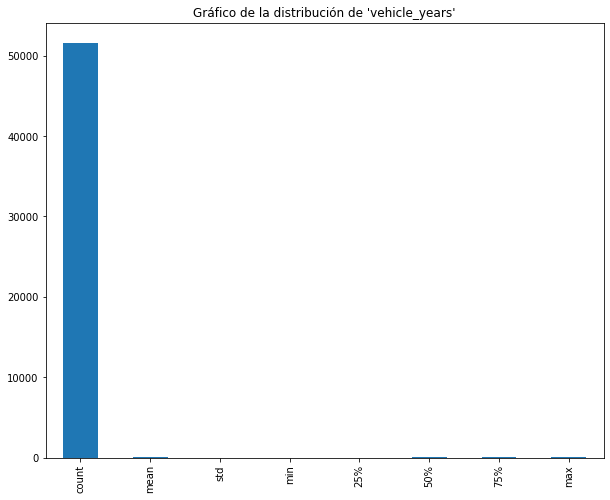

In [ ]:
# Gráfico de la distribución de 'vehicle_years'
vehicle_years_distribution.plot(kind='bar', figsize=(10, 8), title="Gráfico de la distribución de 'vehicle_years'")
plt.show()

La mediana de 'vehicle_years' es de 7 años, mientras que la media, que no está muy alejada, es de 8.5 años. Su valor mínimo es de 0 años, probablemente porque era un modelo del año al ser publicado y el año máximo es 110 ya que también hay autos bastante antiguos a la venta. La mayoría de los valores apenas se pueden apreciar en el gráfico ya que son bastante bajos.

Si revisamos la distribución de 'vehicle_years' en función a la cantidad de anuncios, podemos ver lo siguiente:

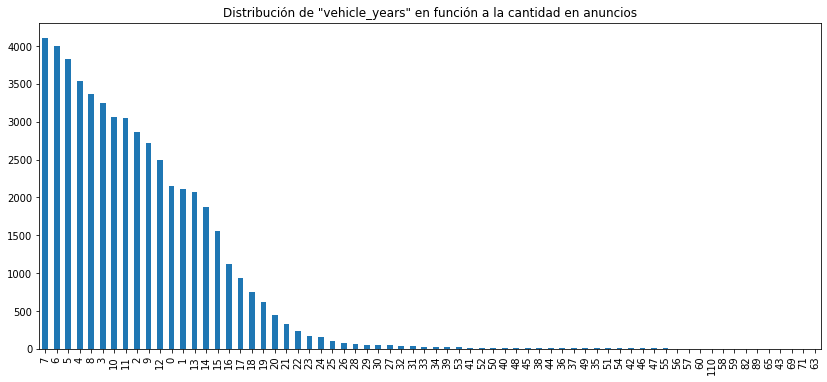

In [ ]:
vehicles_list.vehicle_years.value_counts().plot(kind='bar', figsize=(14,6), title='Distribución de "vehicle_years" en función a la cantidad en anuncios')
plt.show()

Explicado de forma sencilla, podemos observar que mientras más años tiene el vehículo, más escaso es, aunque este patrón no ocurre de forma ordenada. También podemos ver que dominan los vehículos con 5 años, con 4027 anuncios. Además se logra apreciar que hay bastantes vehículos nuevos o semi nuevos.

In [ ]:
print(f"Cantidad de vehículos con 0 años: {len(vehicles_list[vehicles_list.vehicle_years == 0])}")

Cantidad de vehículos con 0 años: 2152


Ahora agruparemos 'vehicle_years' en función a 'price' para conocer los precios por los años del vehículo.

In [ ]:
pivot(vehicles_list, 'vehicle_years', 'price')

,count,mean,median
vehicle_years,,,
0,2152.0,24939.058086,23795.0
1,2106.0,21337.058879,19995.0
2,2863.0,19911.289207,18995.0
3,3243.0,18934.689793,17995.0
4,3532.0,16005.062005,14796.5
...,...,...,...
69,1.0,44900.000000,44900.0
71,1.0,21000.000000,21000.0
82,1.0,5000.000000,5000.0


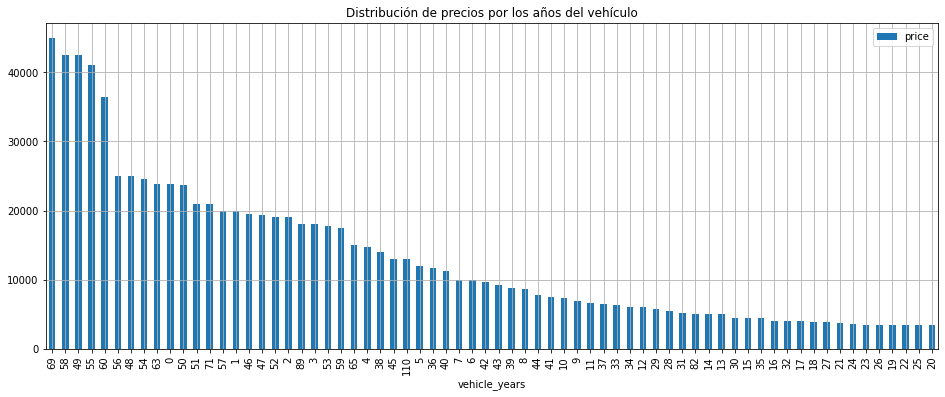

In [ ]:
# Graficamos la distribución basandonos en la mediana
vehicle_years_median_price = vehicles_list.pivot_table(index='vehicle_years', values='price', aggfunc='median')
vehicle_years_median_price.sort_values('price', ascending=False).plot(kind='bar', title='Distribución de precios por los años del vehículo', figsize=(16,6), grid=True)
plt.show()


Sorpresivamente algunos de los autos con más años son lo más caros, esto es probablemente porque son autos antiguos de lujo o reliquias que llegan a superar la mediana de 40.000. Por otro lado los autos nuevos o semi nuevos se posicionan más o menos en la mediana de 24.000. Los autos más antiguos con 110 años se posicionan en los 13.000, y los de menor precio son los de 20 años.

Continuamos con el parámetro millaje u **'odometer'**.

In [ ]:
# Revisamos y graficamos su distribución
odometer_distribution = vehicles_list.odometer.describe()
print(f"Mediana de 'odometer': {vehicles_list.odometer.median().astype(int)}")
odometer_distribution

Mediana de 'odometer': 110908


count     51525.000000
mean     115199.007278
std       60484.868232
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

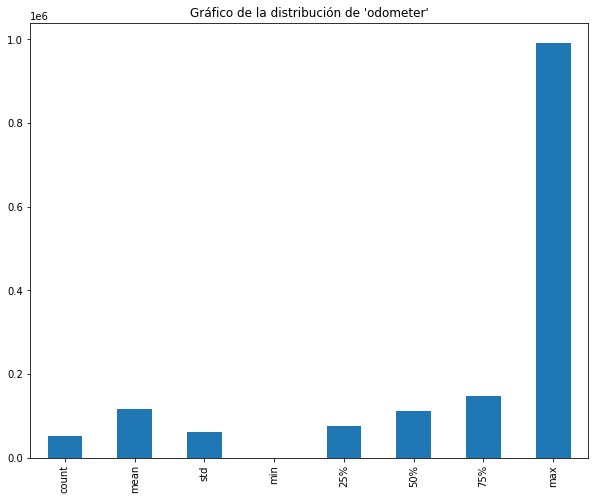

In [ ]:
# Gráfico de la distribución de 'odometer'
odometer_distribution.plot(kind='bar', figsize=(10, 8), title="Gráfico de la distribución de 'odometer'")
plt.show()

La mediana de 'odometer' es 110.908, muy cercana a la media que es 115.199. Su valor máximo es 990.000, bastante alejado de la mediana y probablemente se trate en su mayoría de vehículo más antiguos o con varios años de uso, esto es un claro indicador de valores atípicos. Por otra parte, el valor mínimo es de 0 que debe ser el millaje de los autos nuevos o sin uso.

In [ ]:
# Tabla filtrada por 990000 en 'odometer'
vehicles_list[vehicles_list.odometer == 990000]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,days_listed,ad_weekday,ad_month,ad_year,ad_weekday_str,ad_month_str,vehicle_years,vehicle_years_rounded,odometer_mean_by_year,odometer_grouped
17869,59900,1964,chevrolet corvette,4,8,gas,990000,automatic,convertible,red,...,28,6,6,2018,domingo,junio,54,54,18333,950001_990000
40729,4700,2013,chevrolet cruze,2,6,gas,990000,automatic,sedan,black,...,4,2,5,2018,miércoles,mayo,5,5,198000,950001_990000


Aquí solo hay 2 autos, uno con 54 años por lo que se podría esperar un millaje tan alto, pero también hay otro caso curioso con solo 5 años el mismo millaje. Esto lo veremos más adelante.

In [ ]:
# Tabla filtrada por 0 en 'odometer'
vehicles_list[vehicles_list.odometer == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,days_listed,ad_weekday,ad_month,ad_year,ad_weekday_str,ad_month_str,vehicle_years,vehicle_years_rounded,odometer_mean_by_year,odometer_grouped
352,7997,2009,gmc yukon,3,8,gas,0,automatic,suv,white,...,88,5,3,2019,sábado,marzo,10,10,0,0_50000
814,2995,1999,ford f-150,2,6,gas,0,manual,truck,unknown,...,16,3,3,2019,jueves,marzo,20,20,0,0_50000
1375,5888,2007,toyota 4runner,2,6,gas,0,automatic,suv,black,...,36,4,2,2019,viernes,febrero,12,12,0,0_50000
1461,1000,1992,gmc sierra 1500,2,8,gas,0,automatic,truck,unknown,...,47,4,9,2018,viernes,septiembre,26,26,0,0_50000
1970,10988,2000,ford f-250 sd,2,8,diesel,0,automatic,truck,white,...,39,2,11,2018,miércoles,noviembre,18,18,0,0_50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49170,3300,2002,hyundai santa fe,2,6,gas,0,automatic,wagon,white,...,31,6,4,2019,domingo,abril,17,17,0,0_50000
49284,3300,2002,hyundai santa fe,2,6,gas,0,automatic,wagon,white,...,7,4,2,2019,viernes,febrero,17,17,0,0_50000
50412,25500,2008,jeep wrangler,2,6,gas,0,automatic,suv,yellow,...,48,1,6,2018,martes,junio,10,10,0,0_50000
50631,3600,2012,chrysler 200,2,4,gas,0,automatic,sedan,red,...,90,1,7,2018,martes,julio,6,6,0,0_50000


Al ver la tabla rápidamente, es curioso ver que modelos con varios años tengan un millaje de 0. Esto lo abordaremos más adelante.

Ahora graficaremos 'price' por 'odometer_grouped' para saber como afecta la cantidad de millaje en los valores de los vehículos.

In [ ]:
pivot(vehicles_list, 'odometer_grouped', 'price')

,count,mean,median
odometer_grouped,,,
0_50000,7377.0,20137.448285,19451.0
100001_150000,20325.0,10765.355080,8495.0
150001_200000,8392.0,7489.237726,5712.0
150001_250000,2809.0,6381.421502,4500.0
250001_300000,760.0,5692.513158,4297.5
300001_350000,186.0,6176.645161,4970.0
351000_400000,55.0,7121.600000,5899.0
400001_450000,13.0,5330.615385,3500.0
450001_500000,11.0,5716.818182,4995.0


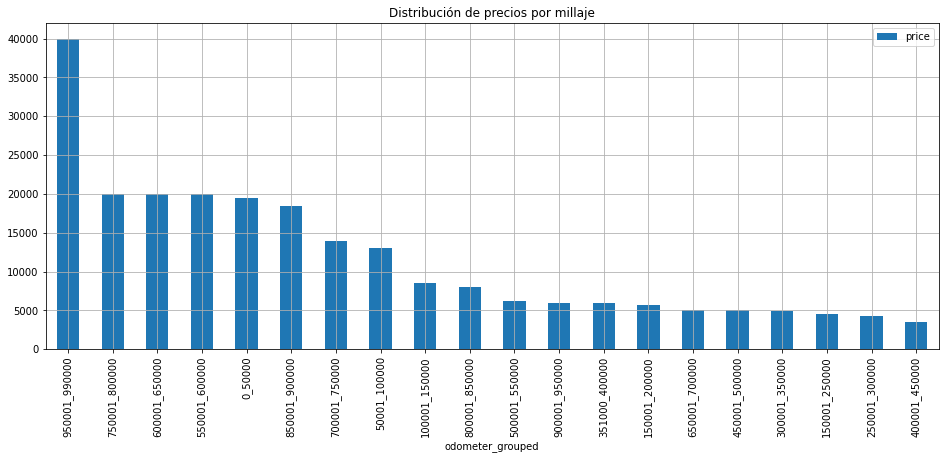

In [ ]:
# Graficamos la distribución basandonos en la mediana
odometer_grouped_median_price = vehicles_list.pivot_table(index='odometer_grouped', values='price', aggfunc='median')
odometer_grouped_median_price.sort_values('price', ascending=False).plot(kind='bar', title='Distribución de precios por millaje', figsize=(16,6), grid=True)
plt.show()

En la tabla **'Distribución de precios por años del vehículo'** vimos que algunos de los auto más caros eran los que tenían más años. Comparando esos datos con estos, hace sentido, ya que aquí se puede ver que los autos con mayor millaje y, por ende, más años, son los más caros, que probablemente se trate de autos antiguos de lujo restaurados o en muy buen estado. Por otra parte están los autos con 0 a 5.000 con un valor medio de 19.500, y los de menor valor tienen un millaje de 40001_45000.

Ahora estudiaremos la cilindrada o parámetro **'cylinders'**

In [ ]:
# Revisamos y graficamos su distribución
cylinders_distribution = vehicles_list.cylinders.describe()
print(f"Mediana de 'cylinders': {vehicles_list.cylinders.median().astype(int)}")
cylinders_distribution

Mediana de 'cylinders': 6


count    51525.000000
mean         6.121067
std          1.657457
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

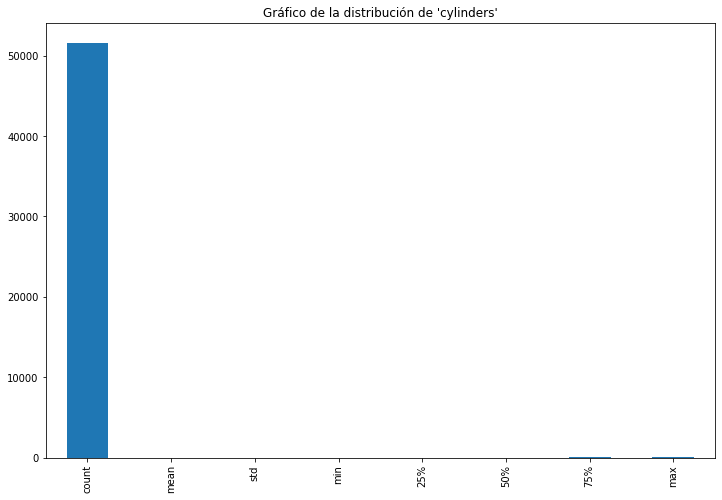

In [ ]:
## Gráfico de la distribución de 'cylinders'
cylinders_distribution.plot(kind='bar', figsize=(12, 8), title="Gráfico de la distribución de 'cylinders'")
plt.show()



Los valores de 'cylnders' son bastante bajos por lo que apenas se logran apreciar en el gráfico, a diferencia de 'count'. Su media es de 6.2 y su mediana de 6. La cilindrada mínima es 3 y la más alta es 12.

In [ ]:
vehicles_list.cylinders.value_counts()

8     17712
6     17435
4     15499
10      549
5       294
3        34
12        2
Name: cylinders, dtype: int64

Al contat los valores podemos verque los vehículos más populares son los de 4, 6 y 8 cilindros.

Ahora agruparemos 'cylinders' con 'price' para sabér más o menos cómo afecta el cilindraje en el valor de los vehículos.

In [ ]:
#Agrupamos 'cylinders' con 'price'
pivot(vehicles_list, 'cylinders', 'price')

,count,mean,median
cylinders,,,
3,34.0,8571.911765,7850.0
4,15499.0,7836.422285,6900.0
5,294.0,7240.438776,6497.5
6,17435.0,12373.427932,9488.0
8,17712.0,15893.543869,13905.0
10,549.0,7237.244080,1.0
12,2.0,19000.000000,19000.0


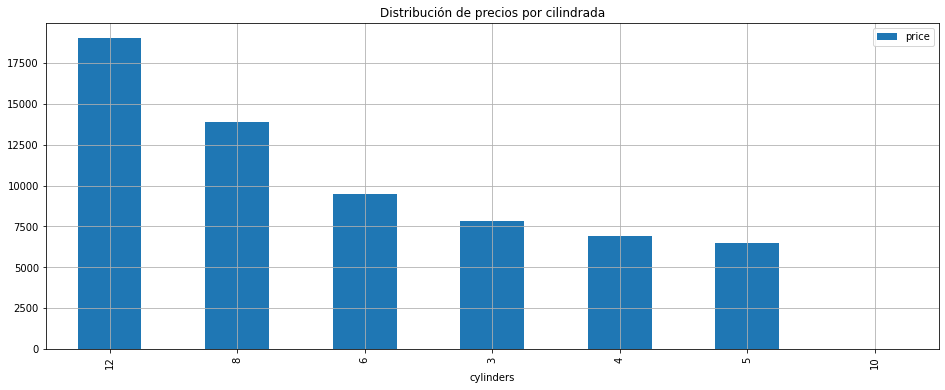

In [ ]:
# Graficamos la distribución basandonos en la mediana
cylinders_median_price = vehicles_list.pivot_table(index='cylinders', values='price', aggfunc='median')
cylinders_median_price.sort_values('price', ascending=False).plot(kind='bar', title='Distribución de precios por cilindrada', figsize=(16,6), grid=True)
plt.show()

Aquí podemos observar que mientras más cilindros más caro es el vehículo pero, por alguna razón que desconocemos, la mediana de 10 cilindros aquí se muestra como 1, mientras su media es 7237. Averigüemos por qué:

In [ ]:
#Filtramos para ver qué ocurre
print(len(vehicles_list[(vehicles_list.price == 1) & (vehicles_list.cylinders == 10)]))
print(len(vehicles_list[vehicles_list.cylinders == 10]))

295
549


Esto ocurre porque la mayoría de los valores de 'cylinders' en 10, son 1, de este modo la mediana nos arroja ese valor. De este modo será mejor graficar basandonos en la media:

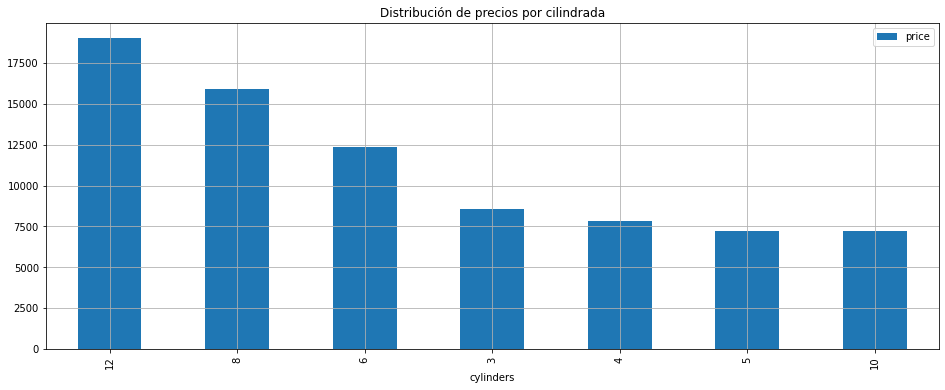

In [ ]:
# Graficamos la distribución basandonos en la media
cylinders_median_price = vehicles_list.pivot_table(index='cylinders', values='price')
cylinders_median_price.sort_values('price', ascending=False).plot(kind='bar', title='Distribución de precios por cilindrada', figsize=(16,6), grid=True)
plt.show()

Aquí también podemos ver que a mayor cilindrada, mayor el precio. No obstante, los vehículos con 10 cilindros con cumplen con este patrón.

Por último estudiaremos el parámetro **'condition'**

In [ ]:
# Revisamos y graficamos su distribución
condition_distribution = vehicles_list.condition.describe()
print(f"Mediana de 'condition': {vehicles_list.condition.median()}")
condition_distribution

Mediana de 'condition': 3.0


count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

Esta columna tiene valores bastante simples, de este modo, no graficaremos su distribución.

In [ ]:
vehicles_list.condition.unique()

array([2, 4, 1, 3, 0, 5])

Estos valores numéricos significan:
- 0 = para rescate
- 1 = razonable
- 2 = bueno
- 3 = excelente
- 4 = como nuevo
- 5 = nuevo


Ahora agruparemos **'condition'** en función a **'price'** para ver si el estado del vehículo incide en su valor.

In [ ]:
pivot(vehicles_list, 'condition', 'price')

,count,mean,median
condition,,,
0,115.0,4242.295652,2500.0
1,1607.0,3386.502178,2500.0
2,20145.0,10877.439067,7900.0
3,24773.0,12806.669842,10495.0
4,4742.0,16677.445593,13995.0
5,143.0,26050.300699,21999.0


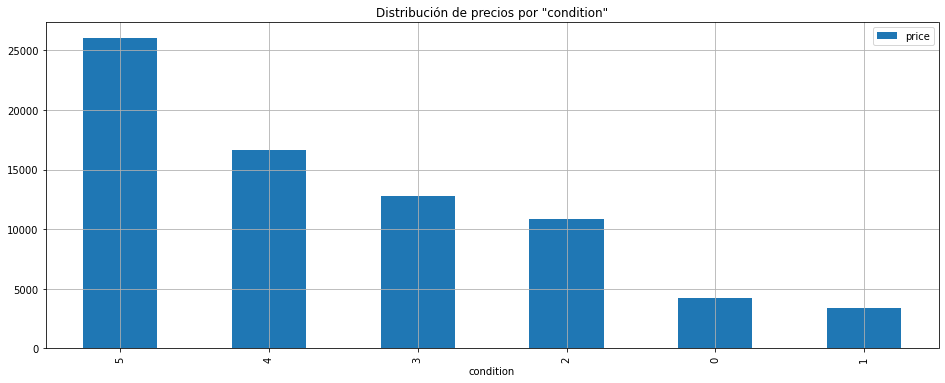

In [ ]:
# Graficamos la distribución basandonos en la media
condition_mean_price = vehicles_list.pivot_table(index='condition', values='price')
condition_mean_price.sort_values('price', ascending=False).plot(kind='bar', title='Distribución de precios por "condition"', figsize=(16,6), grid=True)
plt.show()

Al ver el gráfico, curiosamente los vehículos con la condición 'para rescate'(0) tienen más valor que los de condición 'razonable'(1); esto puede deberse a que los autos 'para rescate' tengan piezas más caras que se pueden reutilizar. Luego desde la condición 'bueno'(2) hasta 'nuevo'(5) los valores van en aumento.

## Estudiar y tratar valores atípicos

Al ver los resultados anteriores, se determinó que los parámetros **'price'** y **'odometer'** tienen valores extremos. De este modo filtraremos estos parámetros y crearemos un DataFrame sin valores atípicos. Comenzaremos revisando la columna **'price'** para establecer sus valores inferiores y superiores.

In [ ]:
vehicles_list.price.describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

Al revisar esta columna, podemos ver que su media es 12.132  y su mediana es 9.000. Su desviación estándar es de 10.040, lo que nos indica que hay valores bastante alejados de la media que deberíamos revisar.

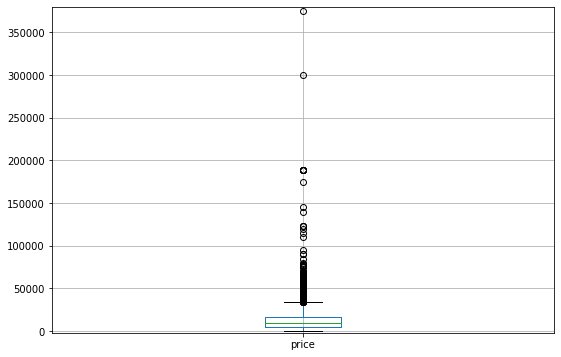

In [ ]:
vehicles_list.boxplot(column='price', figsize=(9,6))
plt.ylim(-2000, 380000)
plt.show()

En el grafico de bigotes podemos ver varios valores atípicos, algunos por encima de los 350.000. Para revisar con más detalle agregaremos los cuartíles al gráfico y lo ampliaremos.

In [ ]:
Q1 = vehicles_list.price.quantile(0.25)
Q3 = vehicles_list.price.quantile(0.75)
print('primer cuantil:', Q1)
print('tercer cuantil:', Q3)

primer cuantil: 5000.0
tercer cuantil: 16839.0


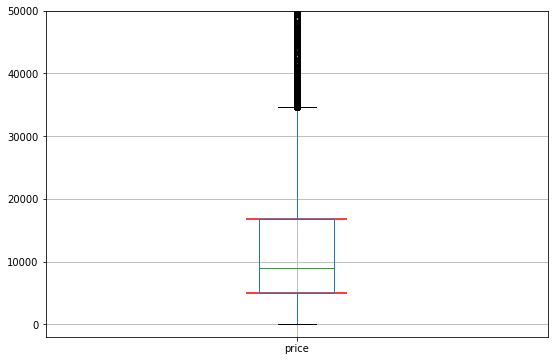

In [ ]:
# Graficamos
vehicles_list.boxplot(column='price', figsize=(9,6))
plt.ylim(-2000, 50000)
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red')
plt.show()


Por otro lado encontramos valores que equivalen a 1, que se coincide con el bigote inferior.

Ahora calcularemos los rangos del bigote inferior y el bigote superior para determinar con exactitud los límites de los valores atípicos de 'price'.

In [ ]:
# Determinamos los límites inferiores y superiores para valores atípicos de 'price
IQR = Q3 - Q1
bigote_superior_price = Q3+1.5*IQR
bigote_inferior_price = Q1-1.5*IQR

print("Bigote superior:", bigote_superior_price)
print("Bigote inferior:", bigote_inferior_price)

Bigote superior: 34597.5
Bigote inferior: -12758.5


Al calcular los límites de los valores con los rangos intercuartiles, determinamos que el límite superior es 34.597. Si bien existen valores que superan los 350.000, estos son los menos representativos del DataFrame. Por otro lado, el límite del bigote inferior es -12758, pero como el valor mínimo de price es 1, este será nuestro límite inferior.

Ahora revisaremos **'odometer'** para establecer sus valores inferiores y superiores.

In [ ]:
# Revisamos y graficamos su distribución
vehicles_list.odometer.describe()

count     51525.000000
mean     115199.007278
std       60484.868232
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

La media de **'odometer'** es 115.199 y su media es 110.908. Luego podemos ver que su valor mínimo es 0, que probablemente sean valores de vehículos nuevos o sin uso, y su valor máximo es 990.000; estos valores altos en el millaje deben deberse a vehículos antiguos o que fueron bastante usados. De este modo, los valores máximos y mínimos se alejan bastante de la media y mediana.

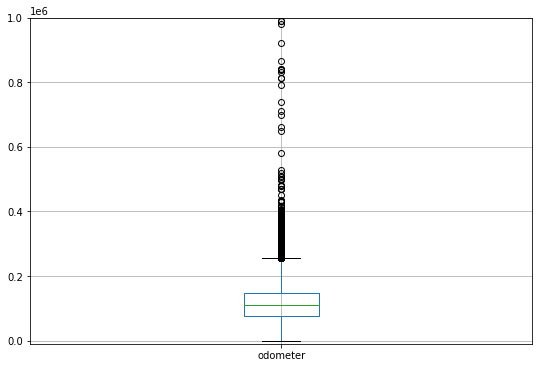

In [ ]:
vehicles_list.boxplot(column='odometer', figsize=(9,6))
plt.ylim(-10000, 1000000)
plt.show()

Cómo lo indica el gráfico de caja, podemos apreciar valores extremos más o menos desde los 230.000 que llegan casi al millón. Nuevamente, para ver el gráfico de forma más detallada le agregaremos los cuartíles y lo ampliaremos.

In [ ]:
# Calculamos el primer y tercer cualtil
Q1 = vehicles_list.odometer.quantile(0.25)
Q3 = vehicles_list.odometer.quantile(0.75)
print('primer cuantil:', Q1)
print('tercer cuantil:', Q3)

primer cuantil: 75668.0
tercer cuantil: 147821.0


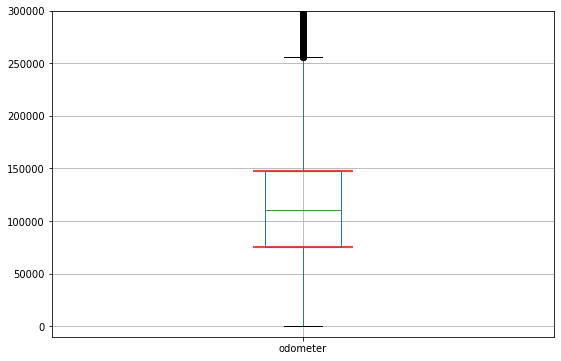

In [ ]:
# Graficamos los valores de odometer
vehicles_list.boxplot(column='odometer', figsize=(9,6))
plt.ylim(-10000, 300000)
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red')
plt.show()

Al ampliar el gráfico, podemos ver que el bigote inferior se coincide con el valor 0, que es el valor mínimo de 'odometer'

Ahora calcularemos los rangos del bigote inferior y el bigote superior para determinar con exactitud los límites de los valores atípicos de 'odometer'.

In [ ]:
# Determinamos los límites inferiores y superiores para valores atípicos de 'odometer'
IQR = Q3 - Q1
bigote_superior_odometer = Q3+1.5*IQR
bigote_inferior_odometer = Q1-1.5*IQR

print("Bigote superior:", bigote_superior_odometer)
print("Bigote inferior:", bigote_inferior_odometer)

Bigote superior: 256050.5
Bigote inferior: -32561.5


Al calcular los límites de los valores con los rangos intercuartiles, determinamos que el límite superior es 256.050. Por otro lado, de acuerdo a los cálculos, el límite del bigote inferior es -35.561, pero como el valor mínimo de 'odometer' es 0, este será nuestro límite inferior.

In [ ]:
# Almacenamos los datos sin valores atípicos en un DataFrame separado
vehicles_list_no_outliers1 = vehicles_list[(vehicles_list['odometer'] >= 0) & (vehicles_list['odometer'] <= bigote_superior_odometer)]
vehicles_list_no_outliers2 = vehicles_list_no_outliers1[(vehicles_list_no_outliers1['price'] >= 1) & (vehicles_list_no_outliers1['price'] <= bigote_superior_price)]

vehicles_list_no_outliers = pd.DataFrame(vehicles_list_no_outliers2)

In [ ]:
# Revisamos la distribución de este DataFrame
vehicles_list_no_outliers.describe()

,price,model_year,condition,cylinders,odometer,days_listed,ad_weekday,ad_month,ad_year,vehicle_years,vehicle_years_rounded,odometer_mean_by_year
count,48958.000000,48958.000000,48958.000000,48958.000000,48958.000000,48958.000000,48958.000000,48958.000000,48958.000000,48958.000000,48958.000000,48958.000000
mean,11190.569876,2009.738408,2.631235,6.068957,113660.394134,39.558642,3.004739,6.628192,2018.307304,8.568896,8.601189,18497.658197
std,7823.692905,5.930535,0.701157,1.658654,53260.366848,28.223362,1.997041,3.474085,0.461381,5.944424,5.900338,15390.758007
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,1.000000,0.000000
25%,4999.000000,2007.000000,2.000000,4.000000,78401.750000,19.000000,1.000000,3.000000,2018.000000,4.000000,4.000000,10394.500000
50%,8995.000000,2011.000000,3.000000,6.000000,111873.000000,33.000000,3.000000,7.000000,2018.000000,8.000000,8.000000,14875.000000
75%,15988.000000,2014.000000,3.000000,8.000000,146100.000000,53.000000,5.000000,10.000000,2019.000000,12.000000,12.000000,21500.000000
max,34595.000000,2019.000000,5.000000,12.000000,256000.000000,271.000000,6.000000,12.000000,2019.000000,110.000000,110.000000,195700.000000


Al revisar la distribución podemos observar que se limitaron los valores máximos y mínimos establecidos en ambas columnas!

In [ ]:
# Revisamos las filas de nuestro DataFrame
vehicles_list_no_outliers.shape

(48958, 22)

In [ ]:
# Calculamos el porcentaje de filas que dejamos fuera del DataFrame
F"Durante este proceso filtramos un {int((len(vehicles_list) - len(vehicles_list_no_outliers))/len(vehicles_list)*100)}% de filas que contenían valores extremos."

'Durante este proceso filtramos un 4% de filas que contenían valores extremos.'

## Estudiar parámetros principales sin valores atípicos

Ahora utilizaremos los datos filtrados para crear nuevos histogramas y los compararemos con los datos anteriores que tenían valores atípicos, es decir, las columnas **'price'** y **'odometer'**. A partir de esto sacaremos algunas conclusiones.


Primero compararemos los valóres de **'price**. Aquí mostraremos los histogramas de esta columnas con sus datos originales y los datos filtrados.

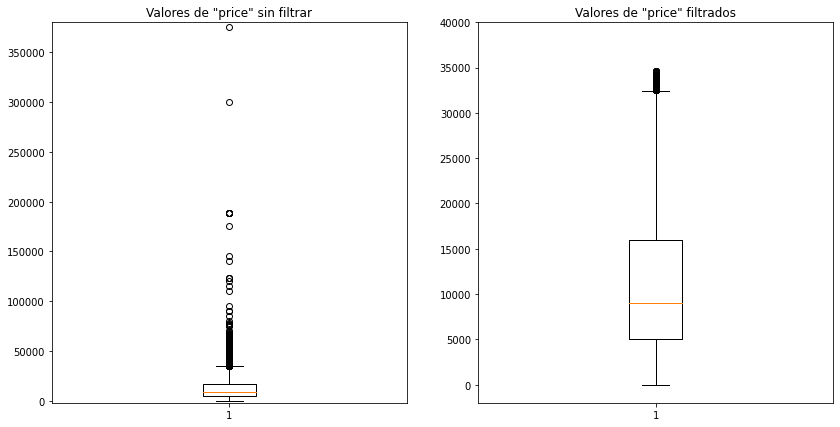

In [ ]:
# Mostramos ambos histogramas para facilitar la comparación
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].boxplot(vehicles_list['price'])
axs[0].set_ylim(-2000, 380000)
axs[0].set_title('Valores de "price" sin filtrar')

axs[1].boxplot(vehicles_list_no_outliers['price'])
axs[1].set_ylim(-2000, 40000)
axs[1].set_title('Valores de "price" filtrados')

plt.show()

Como podemos observar, **'price'** sin filtrar tenía valores atípicos extremadamente altos que superaban los 350.000, siendo su media 12.132 y mediana 9.000. Se determinó por medio de los rangos intercuartiles que su valor máximo sería 34.597, como se puede observar en el histograma ya filtrado a la la derecha. Cabe resaltar que estos valores se correspondían a vehículos de lujos y a vehículos antiguos caros, con valores que no eran representativos del DataFrame. Para el limite inferior se calculó un valor de -12758, pero al ser 1 el valor mínimo de **'price'**, este fue el valor que se le asignó al límite inferior.

A continuación compararemos los datos originales y filtrados de **'odometer'**.

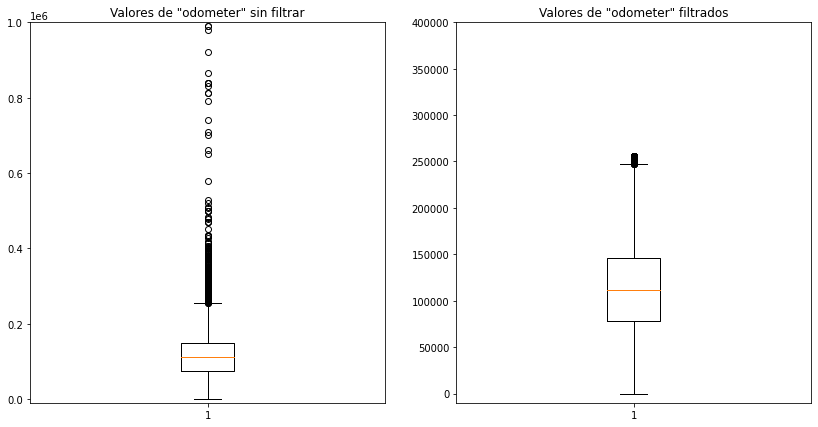

In [ ]:
# Mostramos ambos histogramas
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].boxplot(vehicles_list['odometer'])
axs[0].set_ylim(-10000, 1000000)
axs[0].set_title('Valores de "odometer" sin filtrar')

axs[1].boxplot(vehicles_list_no_outliers['odometer'])
axs[1].set_ylim(-10000, 400000)
axs[1].set_title('Valores de "odometer" filtrados')

plt.show()

En el parámetro **'odometer'** sin filtrar también podemos encontrar valores atípicos bastante altos. Su media era 115.199 y su mediana 110.908 y, como se puede observar en el gráfico, su valo máximo casi alcanzaba el millón de millas (equivalente a casi 1.593.250 km). Al filtrar la tabla con valores por encima de los 800.000, curiosamente vimos que la mayoría de estos vehículos no superaban los 10 años, mientras que había otro vehículo de 54 años del que se podría esperar tal nivel de millaje. Como se puede ver en el gráfico a la derecha, se determinó como límite superior el valor de 256.050 por medio de los rangos inercuartiles. Asimismo, para el límite inferior se calculó un valor de -32.561, pero al ser 0 el valor mínimo de odometer, este valor se estableció con el límite inferior.

In [ ]:
vehicles_list.odometer.describe()

count     51525.000000
mean     115199.007278
std       60484.868232
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

In [ ]:
print(f"Filas y columnas del DataFrame original: {vehicles_list.shape}")
print(f"Filas y columnas del DataFrame filtrado: {vehicles_list_no_outliers.shape}")

Filas y columnas del DataFrame original: (51525, 22)
Filas y columnas del DataFrame filtrado: (48958, 22)


Durante el proceso de filtrado de los valores extremo, se filtró el 4% de de las 51.525 filas del DataFrame original, resultando en un DataFrame de 49.236 filas.

<div class="alert alert-block alert-info">
<b>Así es, creé un segundo DataFrame sin outliers llamado 'vehicles_list_no_outliers' que es el que usé de aquí en adelante en el estudio</b> <a class="tocSkip"></a>
</div>


## Periodo de colocación de los anuncios

A continuación estudiaremos cuántos días fueron mostrados los anuncios por medio de la columna **'days_listed'**. Calcularemos la media y la mediana. También describiremos el periodo de colocación habitual de un anuncio. Finalmente determinaremos cuándo se eliminaron rápidamente los anuncios y cuándo fueron publicados por un tiempo anormalmente alto.

In [ ]:
# Aquí mostraremos exactamente la cantidad de días que se mostraron los anuncios
sorted(vehicles_list_no_outliers.days_listed.unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
# Calculamos la media y la mediana.
vehicles_list_no_outliers.days_listed.describe()

count    48958.000000
mean        39.558642
std         28.223362
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

De acuerdo a los calculos obtenidos, la media de 'days_listed' es 39.55, y su mediana es 33. Además, como vimos más arriba, los días de publicación de los anuncios van desde los 0 hasta los 271. Enfocándonos en la mediana debido al gran rango de valores, podemos concluir de forma más realista que el periodo de colocación habitual de los anuncios es de 33 días.

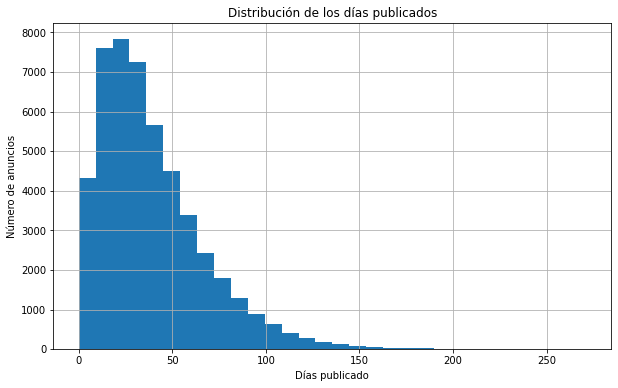

In [ ]:
# Graficamos su distribución de acuerdo a la cantidad de anuncios
plt.figure(figsize= (10,6))
plt.hist(vehicles_list_no_outliers['days_listed'], bins=30)
plt.xlabel('Días publicado')
plt.ylabel('Número de anuncios')
plt.title('Distribución de los días publicados')
plt.grid(True)
plt.show()

A simple vista, el gráfico nos muestra que entre los 20 y 30 días encontramos un pick que casi llega a los 8.000 anuncios. Luego de esto podemos ver que mientras mayores son los días de depublicación, menos son los anuncios. Luego de los 150 días podemos ver que los anuncios son más escasos. Después de, más o menos, los 190 días los anuncios son casi inexistentes.

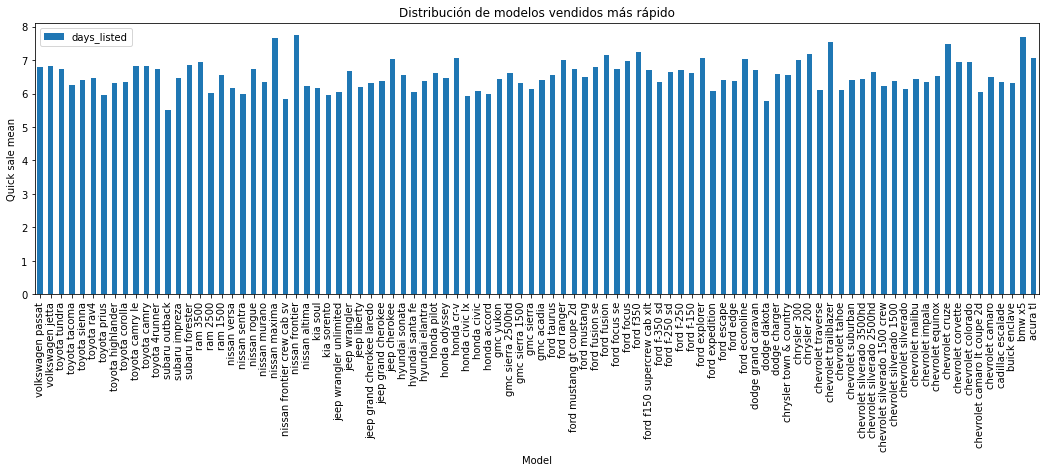

In [ ]:
# Aquí graficamos los promedios de días de los modelos vendidos rápido (menor o igual a 10 días)
quick_sale = vehicles_list_no_outliers.query('days_listed <= 10')
quick_sale.pivot_table(index='model', values='days_listed', aggfunc='mean').sort_values(by='model', ascending=False).plot(kind='bar', figsize=(18,5), title='Distribución de modelos vendidos más rápido')
plt.xlabel('Model')
plt.ylabel('Quick sale mean')
plt.show()


Lo primero que podemos notar sobre los modelos que se venden más rápido (10 días) es que el promedio se ve más o menos parejo para todos los modelos.

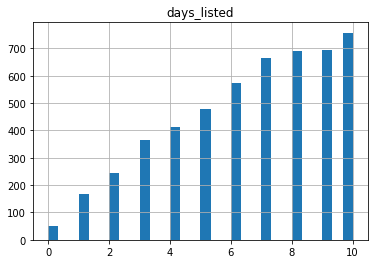

In [ ]:
# Visualizamos un histograma sobre las ventas rápidas
quick_sale.hist('days_listed', bins=30)
plt.show()

Por medio de este histograma podemos ver que la cantidad de vehículos vendidos va en aumento a medida que pasan más días.

Ahora graficaremos los premedios de los modelos que se vendieron más lento. Si averiguamos que el periodo de publicación habitual es de 33 días, estableceremos como un tiempo anormalmente alto el doble del tiempo habitual, es decir, superior o igual a 66 días.

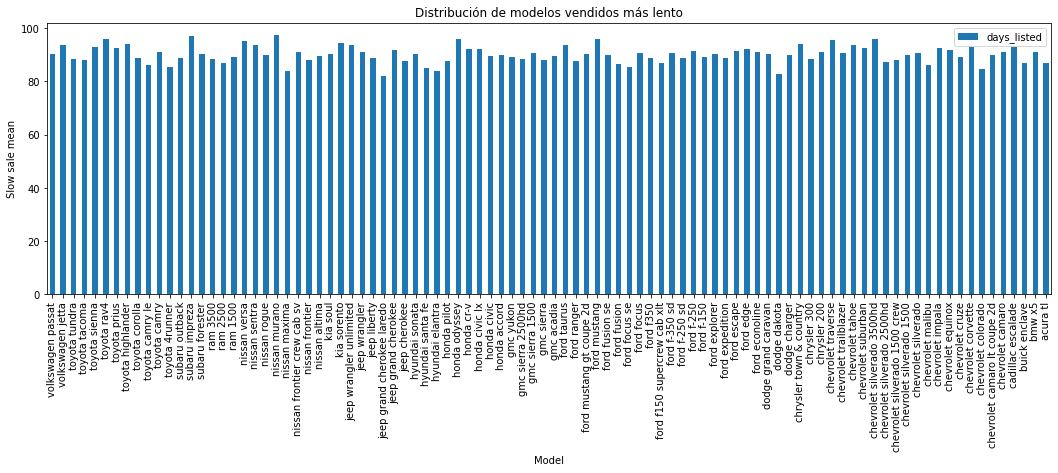

In [ ]:
# Aquí graficamos los promedios de días de los modelos que tardaron más en venderse (mayor o igual a 66 días)
slow_sale = vehicles_list_no_outliers.query('days_listed >= 66')
slow_sale.pivot_table(index='model', values='days_listed', aggfunc='mean').sort_values(by='model', ascending=False).plot(kind='bar', figsize=(18,5), title='Distribución de modelos vendidos más lento')
plt.xlabel('Model')
plt.ylabel('Slow sale mean')
plt.show()

Aquí también podemos ver que los promedios de los modelos son más o menos parejo, se concentran entre los 80 y 100 días.

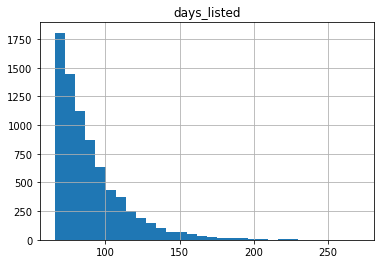

In [ ]:
# Visualizamos un histograma sobre las ventas lentas
slow_sale.hist('days_listed', bins=30)
plt.show()

Por medio de este histograma podemos ver que la mayoría de los vehículos tiene un pick muy pronto, que decrece rápidamente. Asimismo, podemos notar que los vehículos que se venden más lento generalmente no superan los 100 días. También podemos ver que los vehículos con más de 150 días son bastante inusuales.

Para concluir este segmento del análisis, el periodo habitual de la publicación es de 33 días y que el rango de días va de 0 a 271. De acuerdo a los promedios por modelo de ventas rápidas y lentas, pudimos ver que **'model'** no es un factor para que los vehículos se vendan más rápido o más lento, ya que los promedios para ambos casos eran más o menos parejos. Por último pudimos ver que, de acuerdo a los gráficos, los que se venden más lento generalmente no superan los 100 días, y que la cantidad de vehículos que se venden más rápido va en aumento a medida que pasan más días.

## Precio promedio por cada tipo de vehículo

Para continuar analizaremos el precio promedio por cada tipo de vehículo por medio de un gráfico de barras.

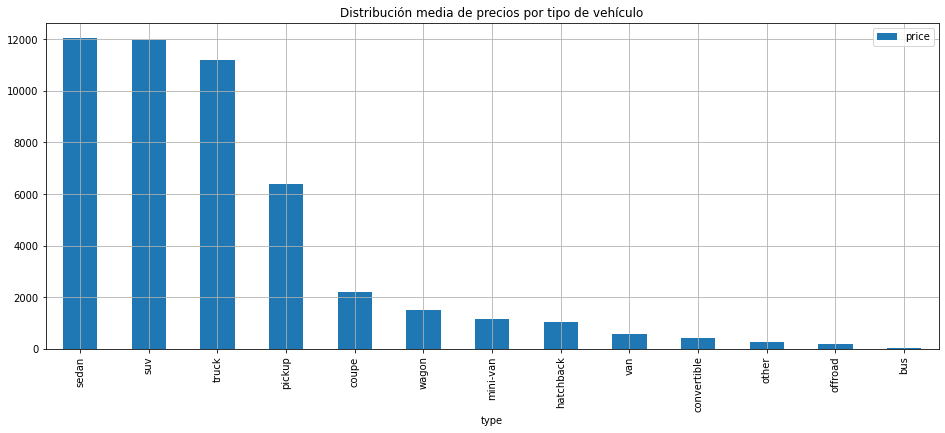

In [ ]:
# Graficamos la distribución basandonos en la mediana
type_median_price = vehicles_list_no_outliers.pivot_table(index='type', values='price', aggfunc='count')
type_median_price.sort_values('price', ascending=False).plot(kind='bar', title='Distribución media de precios por tipo de vehículo', figsize=(16,6), grid=True)
plt.show()

En el gráfico podemos apreciar que 'sedan' y 'suv' son los tipos de vehículos más vendidos en 'Crankshaft List', seguidos por 'truck'.

In [ ]:
sedan_mean = int(vehicles_list_no_outliers[vehicles_list_no_outliers.type == 'sedan']['price'].mean())
suv_mean = int(vehicles_list_no_outliers[vehicles_list_no_outliers.type == 'suv']['price'].mean())

print(f"El valor medio para el vehículo tipo 'sedan' es: {sedan_mean}")
print(f"El valor medio para el vehículo tipo 'suv' es: {suv_mean}")


El valor medio para el vehículo tipo 'sedan' es: 6976
El valor medio para el vehículo tipo 'suv' es: 10434


De este modo determinamos que los modelos tipo 'sedan' y los 'suv' son los más vendidos en 'Crankshaft List', que se venden por una media de 6.964 y 10.434 respectivamente.

## Factores de precio

A continuación estudiaremos los factores que tienen más impacto sobre los precios de los vehículos. Este análisis lo aplicaremos para lo dos tipos de vehículos más populares, es decir **'suv'** y **'sedan'**. De este modo, estudiaremos si el precio depende de la edad del vehículo, millaje, condición, tipo de transmisión y color. Al analizar las variables categóricas, nos aseguraremos de que las categorías tengan al menos 50 anuncios, de lo contrario sus parámetros no serán relevantes para nuestro análisis.

Comenzaremos por analizar las variables categóricas **'transmission'** y **'color'**.

In [ ]:
# Filtramos el DataFrame para obtener solo vehículos tipo 'sedan' y 'suv'
vehicles_sedan_suv = vehicles_list_no_outliers[vehicles_list_no_outliers['type'].isin(['sedan', 'suv'])]

In [ ]:
# Revismos que todos los valores de 'transmission' tengan más de 50 anuncios
transmission_counts = vehicles_sedan_suv['transmission'].value_counts()
transmission_counts


automatic    22640
manual        1073
other          290
Name: transmission, dtype: int64

In [ ]:
# Revismos que todos los valores de 'paint_color' tengan más de 50 anuncios
paint_color_counts = vehicles_sedan_suv['paint_color'].value_counts()
paint_color_counts

unknown    4325
black      3860
silver     3566
white      3375
grey       2760
blue       2250
red        1821
green       621
brown       606
custom      599
orange       90
yellow       69
purple       61
Name: paint_color, dtype: int64

Revisamos efectivamente que todos los valores de ambos parámetros tienen más de 50 anuncios. Ahora graficaremos la distribución de precios por tipo de transmisión del parámetro **'transmission'** y la distribución de precios por colores del parámetro **'paints_color'**, por medio de diagramas de caja.

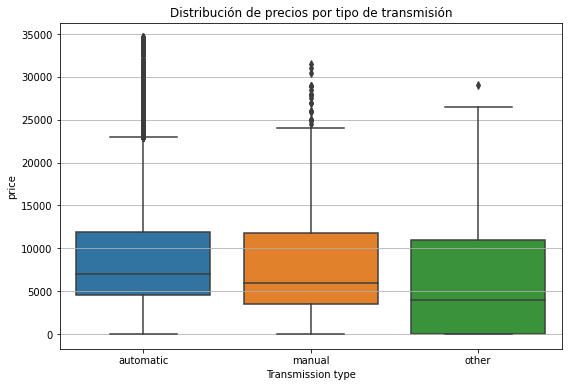

In [ ]:
# Graficamos la distribución de precios por tipo de transmisión
plt.figure(figsize=(9,6))
sns.boxplot(x='transmission', y='price', data=vehicles_sedan_suv)
plt.xlabel("Transmission type")
plt.title("Distribución de precios por tipo de transmisión")
plt.grid(axis='y')
plt.show()

Al mirar el gráfico podemos observar que los vehículos con transmisión automática alcanzan el precio máximo, seguidos por la transmisión manual que llega al precio de 32.000. Con esto concluimos los vehículos de transmisión automática son los más caros.

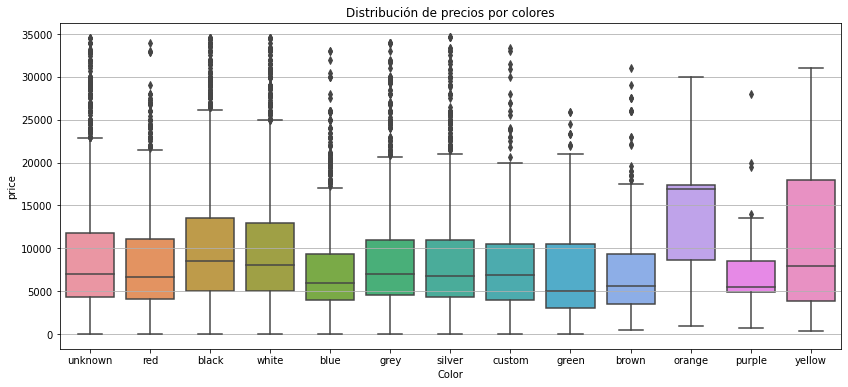

In [ ]:
# Graficamos la distribución de precios por colores del parámetro 'paint_color'
plt.figure(figsize=(14,6))
sns.boxplot(x='paint_color', y='price', data=vehicles_sedan_suv)
plt.xlabel("Color")
plt.title("Distribución de precios por colores")
plt.grid(axis='y')
plt.show()

De manera general, al observar el gráfico la mayoría de los colores llegan o se acercan al valor máximo, a excepción de 'green' y 'purple'. Se ve que los colores más populares son el blanco y el negro, pero al ser tantas alternativas y no poder observar un patrón sólido, concluimos que no hay una relación sólida entre los precios y los colores.

Ahora analizaremos los parámetros edad, millaje, condición, o **'vehicle_years'**, **'odometer'** y **'condition'**, por medio de gráficos de dispersión.

- Comenzamos por **'vehicle_years'**

In [ ]:
# Mostramos la distribución de 'vehicle_years'
vehicles_sedan_suv.vehicle_years.describe()

count    24003.000000
mean         8.050077
std          5.114666
min          0.000000
25%          4.000000
50%          7.000000
75%         11.000000
max        110.000000
Name: vehicle_years, dtype: float64

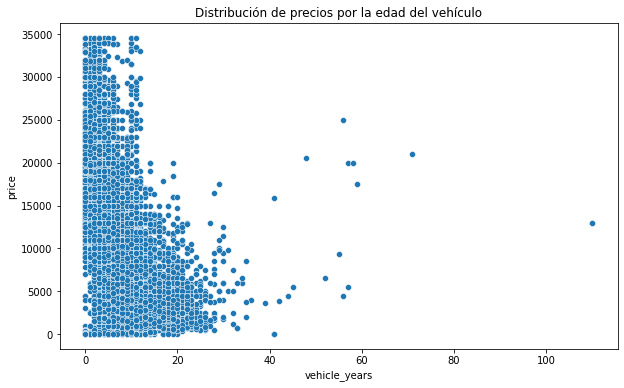

In [ ]:
# Graficamos la distribución de precios por la edad del vehículo, o 'vehicle_years'
plt.figure(figsize=(10,6))
sns.scatterplot(x='vehicle_years', y='price', data=vehicles_sedan_suv)
plt.title("Distribución de precios por la edad del vehículo")
plt.show()


Al observar el gráfico podemos ver que los valores máximos de 'price' se encuentran entre los 0 y 15 años de los vehículos, luego de esto los precios comienzan a caer de forma drástica; es decir, mientras más edad, menor el precio.

- Continuamos con **'odometer'**

In [ ]:
# Mostramos la distribución de 'odometer'
vehicles_sedan_suv.vehicle_years.describe()

count    24003.000000
mean         8.050077
std          5.114666
min          0.000000
25%          4.000000
50%          7.000000
75%         11.000000
max        110.000000
Name: vehicle_years, dtype: float64

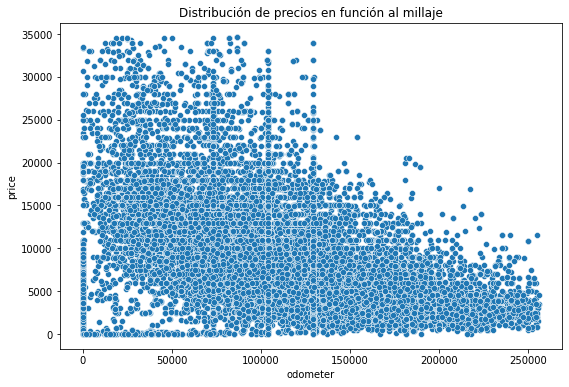

In [ ]:
# Graficamos la distribución de precios en función al millaje, u 'odometer'
plt.figure(figsize=(9,6))
sns.scatterplot(x='odometer', y='price', data=vehicles_sedan_suv)
plt.title("Distribución de precios en función al millaje")
plt.show()

Para el millaje, podemos encontrar valores máximos entre las 0 y 130.000 millas, luego de esto los precios van bajando de forma gradual. En otras palabras, mientras más uso tiene el vehículo, más bajo es su valor, lo que tiene bastante sentido.

- Fnalmente estudiamos el parámetro **'condition'**

In [ ]:
# Mostramos la distribución de 'condition'
vehicles_sedan_suv.condition.describe()

count    24003.000000
mean         2.697704
std          0.699987
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

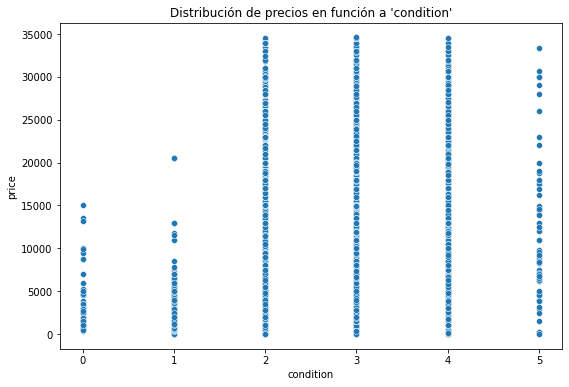

In [ ]:
# Graficamos la distribución de precios en función a la condición, o 'condition'
plt.figure(figsize=(9,6))
sns.scatterplot(x='condition', y='price', data=vehicles_sedan_suv)
plt.title("Distribución de precios en función a 'condition'")
plt.show()

Primero, para poder analizar este gráfico debemos recordar el significado de los valores de **'condition'**:
- 0 = para rescate
- 1 = razonable
- 2 = bueno
- 3 = excelente
- 4 = como nuevo
- 5 = nuevo

Al observar nuestro gráfico, los vehículos con peores condiciones (0 y 1) son los que tienen los valores más bajos, apenas superando los 15.000. Por otra parte, los valores 2, 3 y 4 alcanzan el precio máximo. Cabe resaltar que, al ver el gráfico, los vehículos nuevos (5) existen en menor cantidad, y que no superan el precio de vehículos en condición 2, 3 y 4. Como conclusión, el estado del vehículo incide en gran medida en su precio.

Por último, graficamos una matriz para estudiar la correlación de los parámetros 'price', 'condition', 'odometer' y 'vehicle_years'.

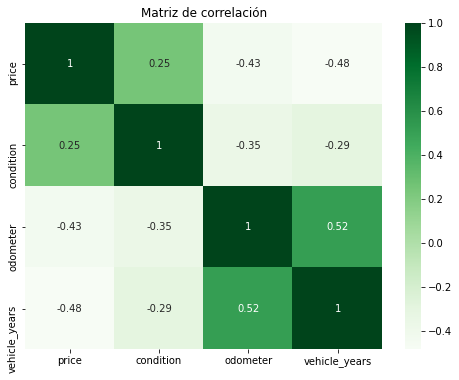

In [ ]:
# Graficamos un mapa de calor para las variables numéricas
corr = vehicles_sedan_suv[['price', 'condition', 'odometer', 'vehicle_years']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap= "Greens")
plt.title('Matriz de correlación')
plt.show()

Al observar la matriz de correlación podemos ver que:

- La correlación entre **'price' y 'vehicle_years' es de -0.48** que es una correlación negativa moderada. Esto quiere decir que a medida que 'vehicle_years' aumenta, 'price' desciende.
- La correlación entre **'price' y 'odometer' es de -0.43** que es, también, una correlación negativa moderada. Lo que nos indica que mientras 'odometer' aumente, 'price' va a bajar.
- La correlación entre **'price' y 'condition' es de 0.29** que es una correlación moderada-baja. Esto quiere decir que los vehículos con mejor condición tienden a tener precios más elevados, sin embargo, esta relación es débil ya que el valor de la correlación está bastante alejado de 1.

## Conclusión general

Como conclusión general, lo que pudimos determinar fue que los parámetros 'odometer', 'condition', y 'model_years' tienen una gran incidencia el los precios de los vehículos. A modo de resumen y en palabras más simples, mientras más era el millaje de los vehículos, menor era el precio, debido a un mayor uso. Esto también aplicaba para 'vehicle_years', mientras mayor era la edad, menor el valor. Y, además, mientras mejor era la condición, mayor era su valor, aunque esta correlación era más bien débil. Los autos con transmisión automática eran más caros, y no pudimos encontrar una relación sólida entre el 'color_paint' y los precios.

Al comenzar el estudio nos encontramos con un DataFrame de 51.525 filas y 13 columnas, de las que las columnas:
-'model_year' tenía un 7% de valores ausentes,
-'cylinders' un 10% de valores ausentes,
-'odometer un 15% de valores ausentes',
-'paint_color' un 17% de valores ausentes y
-'is_4wd' un 50% de valores ausentes.

Los cuales fueron abordados deforma realista.

- Por otra parte, no encontramos datos duplicados.
- También cambiamos de formato float64 a int64 las columnas **'odometer'**, **'model_year'** y **'odometer'** para que se vieran más ordenadas, y la columna **date_posted'** a DateTime para poder filtrar por fechas o separar esta información.
- Agregamos información al Dataframe que nos ayudaría a facilitar el estudio de los datos, como por ejemplo las columnas: 'vehicle_years', 'odometer_grouped', 'model_years_group', entre otras.
-Además, encontramos que parámetros importantes tales como 'odometer' y 'price' tenían valores atípicos, de este modo establecimos límites superiores e inferiores por medio de rangos intercuartiles y por medio de la visualización de estas columnas en gráficos de caja. Para 'odometer' concluimos que gran variedad de los valores extremos pertenecían a autos antiguos o vehículos con mucho uso. Y en el caso de 'price', concuimos que los valores atípicos correspondían a vehículos de lujo o autos antiguos considerados como reliquias en excelente estado, sin embargo estos datos no eran representativos del DataFrame.
- También se creo otro DataFrame llamado 'vehicle_list_no_outliers' sin valores extremos, cuyos límites superiores e inferiores se establecieron por medio de rangos intercuartiles.
- Por otra parte calculamos los días que habitualmente duraban los anuncios que era 33. Establecimos un plazo corto de 10 o menos días y un plazo anormalmente alto de 66 días o más.
- Determinamos que los modelos tipo 'sedan' y los 'suv' eran los más vendidos en 'Crankshaft List', de modo que filtramos nuestro DataFrame solo con estos tipos de vehículos.
- Cabe destacar que terminamos analizando un DataFrame de 24.003 columnas y 22 filas debido a que agregamos columnas y filtramos información, pasos necesarios para poder llevar a cabo este estudio de una forma correcta.
- Finalmente estudiamos los factores que más afectaban en los precios de los vehículos, es decir, los parámetros 'odometer', 'vehicle_years', 'condition', 'transmission' y 'paint_color', siendo los tres primeros los más importantes. Este análisis lo llevamos a cabo por medio de gráficos de dispersión, diagramas de caja y una matriz de correlación.
